# Analyse des tendances YouTube
## Marwan GUERNOUG et Rayan BELMADANI
<p>&nbsp;</p>
<img src="https://i.ytimg.com/vi/GZmGmkOJ9ME/maxresdefault.jpg" width=600>
<p>&nbsp;</p>

## Introduction

YouTube est la plus grande et la plateforme la plus populaire de vidéo sur Internet dans le monde. Tous les jours, l'onglet tendance de la plateforme se met à jour pour afficher des vidéos qui ont un pic de vue et d'interaction sur la vidéo inhabituel. Dans cette *analyse*, nous allons voir les vidéos qui ont été sur l'onglet tendance sur **YouTube France** et ainsi voir ce qui est commun entre ces vidéos. Ces informations pourront également être utilisées par les personnes qui souhaitent accroître la popularité de leurs vidéos sur YouTube avec la bonne formule pour être en tendance.

Nous allons pour cela utiliser un jeu de données contenant environ `41000` **vidéos** venant de **YouTube Open Data** qui répertorie toutes les vidéos françaises en tendance.

## Objectif de notre analyse
* Combien de vues ont les vidéos en tendances ? La plupart d'entre elles ont-elles un grand nombre de vues ? Est-il nécessaire d'avoir un grand nombre de vues pour qu'une vidéo soit en tendance ?
* Même question pour le nombre de likes et le nombre de commentaires sur les vidéos
* Quelle vidéo est restée le plus longtemps en tendance YouTube ?
* Pour attirer des vues, les vidéastes n'hésitent pas à mettre des titres en majuscules. Combien il y a t'il de vidéo qu'avec des majuscules en tendance ? Cette méthode fonctionne t'elle réellement ?
* Quelle est la longueur des titres des vidéos ? Cette durée est-elle liée au fait que la vidéo devienne populaire ?
* Quelle est la corrélation entre : les vues, les likes, les dislikes, les commentaires, la longueur des titres et d'autres dimension 
* Quels sont les mots les plus courants dans les titres de vidéos en tendance ?
* Quelle chaîne YouTube a le plus de vidéos en tendance ?
* Quelle catégorie de vidéo (par exemple, divertissement, jeux-video, comédie, etc.) compte le plus grand nombre de vidéos tendances ?
* Quand les vidéos de tendances ont-elles été publiées ? Quels jours de la semaine ? À quelles heures de la journée ?



### Importation des données et des bibliothèques

Tout d'abord, nous importons quelques bibliothèqyes `Python` qui nous aideront à analyser les données, en particulier `pandas` pour l'analyse des données et `matplotlib` pour la visualisation.

In [150]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from collections import Counter
import datetime
import wordcloud
import json
import sklearn
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.float_format = '{:.2f}'.format
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

### Lecture des données

Nous allons lire le jeu de données csv des vidéos tendances de YouTube France.

In [151]:
data_set = pd.read_csv("/kaggle/input/youtube-new/FRvideos.csv") # Lecture des données

### Découverte des données

Nous allons voir ce qu'il y a dans notre csv et avoir un aperçu des colonnes et des individus.

In [152]:
data_set.head()

video_id trending_date  \
0  Ro6eob0LrCY      17.14.11   
1  Yo84eqYwP98      17.14.11   
2  ceqntSXE-10      17.14.11   
3  WuTFI5qftCE      17.14.11   
4  ee6OFs8TdEg      17.14.11   

                                               title        channel_title  \
0           Malika LePen : Femme de Gauche - Trailer  Le Raptor Dissident   
1  LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...              Le Labo   
2  DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...      Daniil le Russe   
3                    PAPY GRENIER - METAL GEAR SOLID    Joueur Du Grenier   
4  QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...    Aurelien Fontenoy   

   category_id              publish_time  \
0           24  2017-11-13T17:32:55.000Z   
1           24  2017-11-12T15:00:02.000Z   
2           23  2017-11-13T17:00:38.000Z   
3           20  2017-11-12T17:00:02.000Z   
4           17  2017-11-13T16:30:03.000Z   

                                                tags   views  likes  dislikes  \
0  Raptor"|"Dissident"|"Expliquez"|"moi"|"cette"|...  212702  29282      1108   
1                                             [none]  432721  14053       576   
2      cartoon"|"pokémon"|"école"|"ours"|"мультфильм  482153  76203       477   
3  Papy grenier"|"Metal Gear Solid"|"PS1"|"Tirage...  925222  85016       550   
4  vélo"|"vtt"|"bmx"|"freestyle"|"bike"|"mtb"|"di...  141695   8091        72   

   comment_count                                  thumbnail_link  \
0           3817  https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg   
1           1161  https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg   
2           9580  https://i.ytimg.com/vi/ceqntSXE-10/default.jpg   
3           4303  https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg   
4            481  https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Dimanche.\n18h30.\nSoyez présents pour la vidé...  
1  Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...  
2  Une nouvelle dose de dessins animés français e...  
3  Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...  
4  Sauts à plus de 4 mètres de haut dans un tramp...

Nous allons également voir combien d'individus nous avons dans ce jeu de données, combien de colonnes, combien de données qualitatives/quantitatives et s'il y a des données manquantes.

In [153]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 16 columns):
video_id                  40724 non-null object
trending_date             40724 non-null object
title                     40724 non-null object
channel_title             40724 non-null object
category_id               40724 non-null int64
publish_time              40724 non-null object
tags                      40724 non-null object
views                     40724 non-null int64
likes                     40724 non-null int64
dislikes                  40724 non-null int64
comment_count             40724 non-null int64
thumbnail_link            40724 non-null object
comments_disabled         40724 non-null bool
ratings_disabled          40724 non-null bool
video_error_or_removed    40724 non-null bool
description               37812 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


Nous pouvons voir qu'il y a `40724` individus dans notre jeu de données. Dans la colonne `description`, il y a `2912` données manquantes. Mais il n'y a pas d'autres données manquantes. Nous avons **5** colonnes avec des données quantitatives, **8** colonnes avec des données qualitatives et **3** colonnes dont le résultat est binaires.

### Données manquantes

Nous allons corriger les `2912` données manquantes. Comme la colonne `description` contient des données qualitatives, nous pouvons remplacer les colonnes `null` par un champ vide.

In [154]:
data_set[data_set["description"].apply(lambda l: pd.isna(l))].head(10)

video_id trending_date  \
63   SoDxxEyxE84      17.14.11   
75   tlSLFSw_lYs      17.14.11   
94   rfZuiD2MaUM      17.14.11   
104  RcFT1BlWYSY      17.14.11   
109  rJiyAQPrTVc      17.14.11   
114  jVH6-eQwGjE      17.14.11   
121  q1IyHz7BR2Y      17.14.11   
128  5QE2UWudkaY      17.14.11   
146  hZ73Ry3YthE      17.14.11   
154  cAhp-JLDiRI      17.14.11   

                                                 title  \
63   Raquel Garrido explique son départ de FI - Les...   
75   Kabila pousse Tshibala vers la porte de sortie...   
94   Karl Lagerfeld descend Merkel dans Salut les T...   
104  اعلامية قطرية ثتحدت عن المبلغ الذي ستمنحه الفي...   
109  شاهد فرحة محليلي قناة BEIN SPORT فرحة كبيرة لم...   
114  REPLAY de la DEMI FINALE 1 de l'Afrique a Un I...   
121  Նռան հատիկ, Սերիա 46 / Pomegranate seed / Nran...   
128  TOKOMI WAPI DU13 11 2017 NINI ElAMUKI  LELO NA...   
146          لحظة وصول أسود الأطلس إلى مطار الرباط سلا   
154  Il brule de la neige, elle ne fond pas | Proje...   

                        channel_title  category_id              publish_time  \
63                     Gaetano Gitano           22  2017-11-12T21:30:42.000Z   
75                        lokoleelela           25  2017-11-13T08:35:59.000Z   
94                                SQO           22  2017-11-11T19:09:59.000Z   
104                 الكرة العالمية TV           22  2017-11-13T12:50:43.000Z   
109                             OZ TV           28  2017-11-11T19:57:53.000Z   
114  L'Afrique a un incroyable talent           24  2017-11-12T20:30:00.000Z   
121                    PanArmenian TV            1  2017-11-13T18:30:01.000Z   
128            NDEKO ELIEZER TOKOKOMA           22  2017-11-13T13:19:40.000Z   
146                           Medi1TV           24  2017-11-12T10:44:04.000Z   
154             La Chaine Qui Dérange           27  2017-11-13T10:23:50.000Z   

                                                  tags   views  likes  \
63                                              [none]   12740    110   
75                                              [none]   26260    182   
94                                              [none]   23722     88   
104  المغرب"|"المنتخب المغربي"|"المبلغ الذي ستمنحه ...  108303    599   
109                                             [none]  848688   2736   
114                                             [none]   70645   1335   
121  Նռան հատիկ"|"Սերիա 46"|"Pomegranate seed"|"Nra...   54031    227   
128                                             [none]   28578    445   
146                                             [none]  177851   1365   
154  neige"|"haarp"|"meteo"|"strange"|"étrange"|"bi...    3120    119   

     dislikes  comment_count                                  thumbnail_link  \
63         16             69  https://i.ytimg.com/vi/SoDxxEyxE84/default.jpg   
75         44            156  https://i.ytimg.com/vi/tlSLFSw_lYs/default.jpg   
94         25             60  https://i.ytimg.com/vi/rfZuiD2MaUM/default.jpg   
104        87             83  https://i.ytimg.com/vi/RcFT1BlWYSY/default.jpg   
109       523            433  https://i.ytimg.com/vi/rJiyAQPrTVc/default.jpg   
114        63            527  https://i.ytimg.com/vi/jVH6-eQwGjE/default.jpg   
121        35             72  https://i.ytimg.com/vi/q1IyHz7BR2Y/default.jpg   
128        38            201  https://i.ytimg.com/vi/5QE2UWudkaY/default.jpg   
146        69            122  https://i.ytimg.com/vi/hZ73Ry3YthE/default.jpg   
154        33             59  https://i.ytimg.com/vi/cAhp-JLDiRI/default.jpg   

     comments_disabled  ratings_disabled  video_error_or_removed description  
63               False             False                   False         NaN  
75               False             False                   False         NaN  
94               False             False                   False         NaN  
104              False             False                   False         NaN  
109              False           

Nous allons maintenant remplacer les données `NaN`

In [155]:
data_set["description"] = data_set["description"].fillna(value="")
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 16 columns):
video_id                  40724 non-null object
trending_date             40724 non-null object
title                     40724 non-null object
channel_title             40724 non-null object
category_id               40724 non-null int64
publish_time              40724 non-null object
tags                      40724 non-null object
views                     40724 non-null int64
likes                     40724 non-null int64
dislikes                  40724 non-null int64
comment_count             40724 non-null int64
thumbnail_link            40724 non-null object
comments_disabled         40724 non-null bool
ratings_disabled          40724 non-null bool
video_error_or_removed    40724 non-null bool
description               40724 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


Désormais, nous avons toutes nos données pour débuter notre analyse.

# Année de mise en ligne

Quelle est la répartition de mise en ligne des vidéos sur les 2 années de notre jeu de données ?

In [156]:
data_set["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2018   0.76
2017   0.24
Name: trending_date, dtype: float64

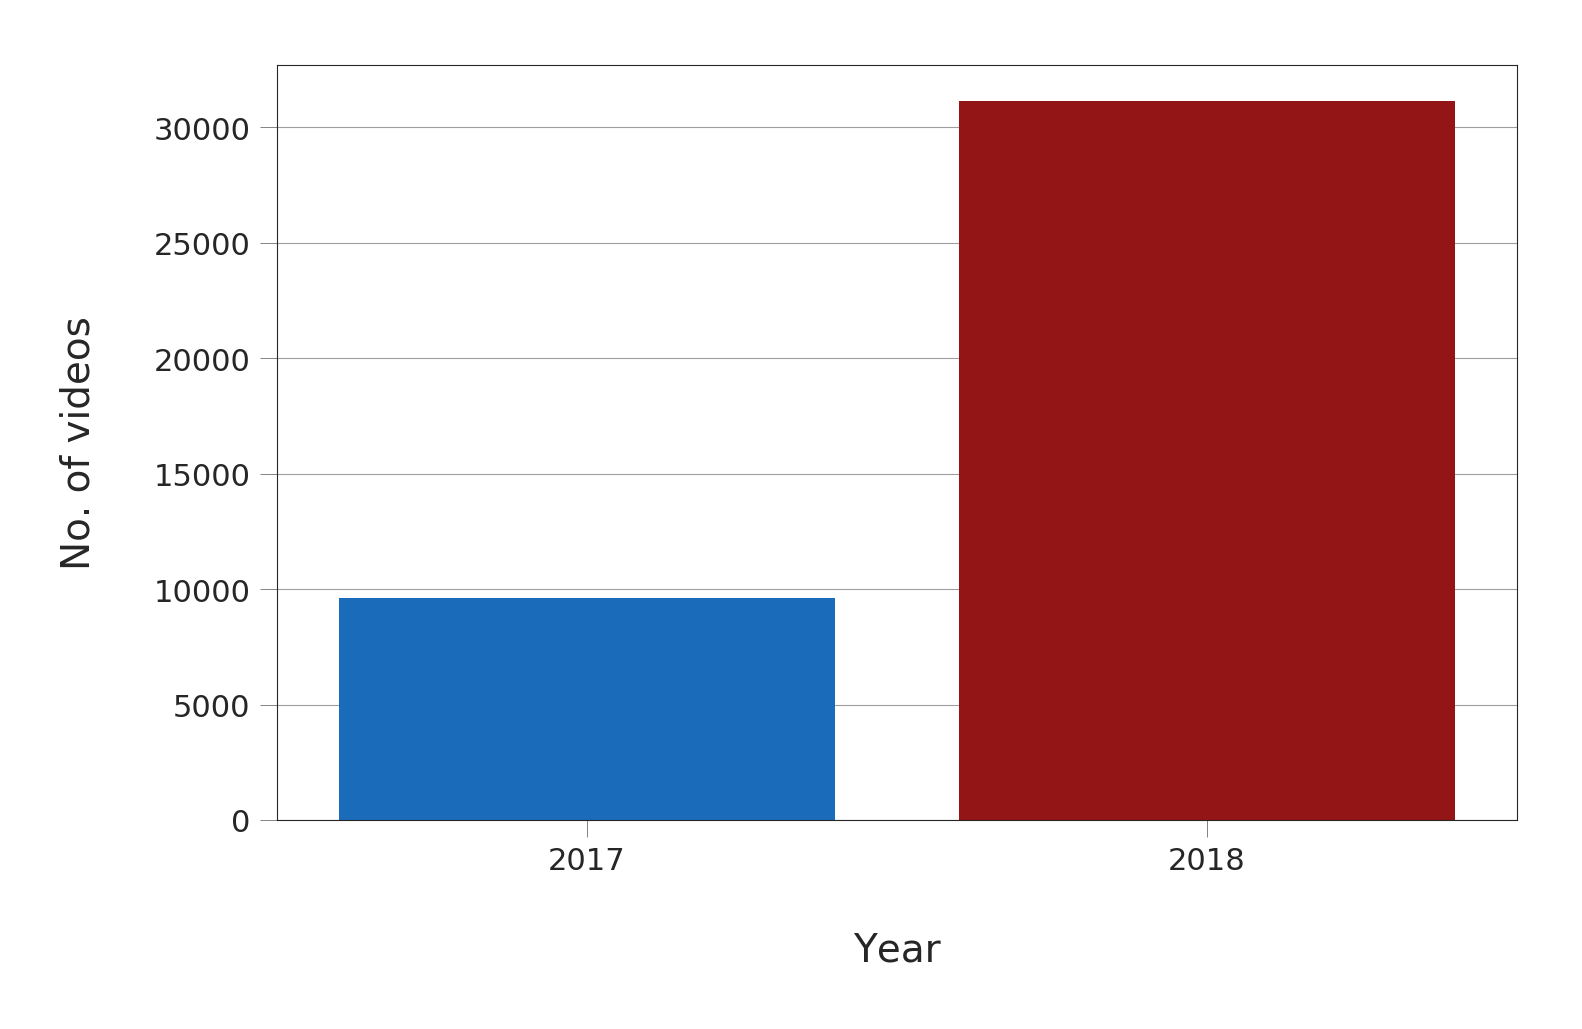

In [157]:
upload_year = data_set["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=upload_year, 
                palette=sns.color_palette(['#006bd6', '#a80000'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

*1/4* soit **23,561%** des vidéos ont été mises en ligne en 2017 et *3/4* soit **76,439%** des vidéos ont été mises en ligne en 2018.

# Analyse des données numériques

Nous allons voir quelques statistiques sur nos données numériques.

In [158]:
data_set.describe()

category_id        views      likes   dislikes  comment_count
count     40724.00     40724.00   40724.00   40724.00       40724.00
mean         20.12    419921.85   17388.86     814.96        1832.45
std           6.98   1772129.64   87205.09   11392.19       14043.21
min           1.00       223.00       0.00       0.00           0.00
25%          17.00     16974.50     338.00      18.00          56.00
50%          23.00     73721.00    1892.50      83.00         235.00
75%          24.00    270808.75    7969.50     335.00         841.00
max          44.00 100911567.00 4750254.00 1353661.00     1040912.00

Voici ce que nous pouvons constater avec ces statistiques:
* En moyenne, les vidéos en tendance sont vues **419 921 fois**
* La valeur médiane du nombre de vues est de **73 721 vues** ce qui signifie que **50%** des vidéos qui ont été en tendance sur YouTube **ont moins de 73 721 vues**. C'est un chiffre facilement ateignable sur le plateforme de Google.
* Le nombre moyen de like dans une vidéo en tendance est de `17 388` contre `814` dislikes
* Il y a `1 832` commentaires sur une vidéo en moyenne

Cela montre qu'il y a beaucoup d'intéractions sur une vidéo en tendance de la part des spectateurs. Il faut que la vidéo soit un minimum commentée et likée pour montrer à l'algorithme de YouTube que la vidéo sucite de l'interêt chez le spectateur. Il ne doit pas seulement regarder la vidéo mais intéragir avec le créateur.

### Histogramme des vues
Nous allons tracer un histogramme pour voir la distribution de la colonne `vues`. Le but est de voir combien de vidéos ont entre 10 et 20 millions de vues ou même plus.

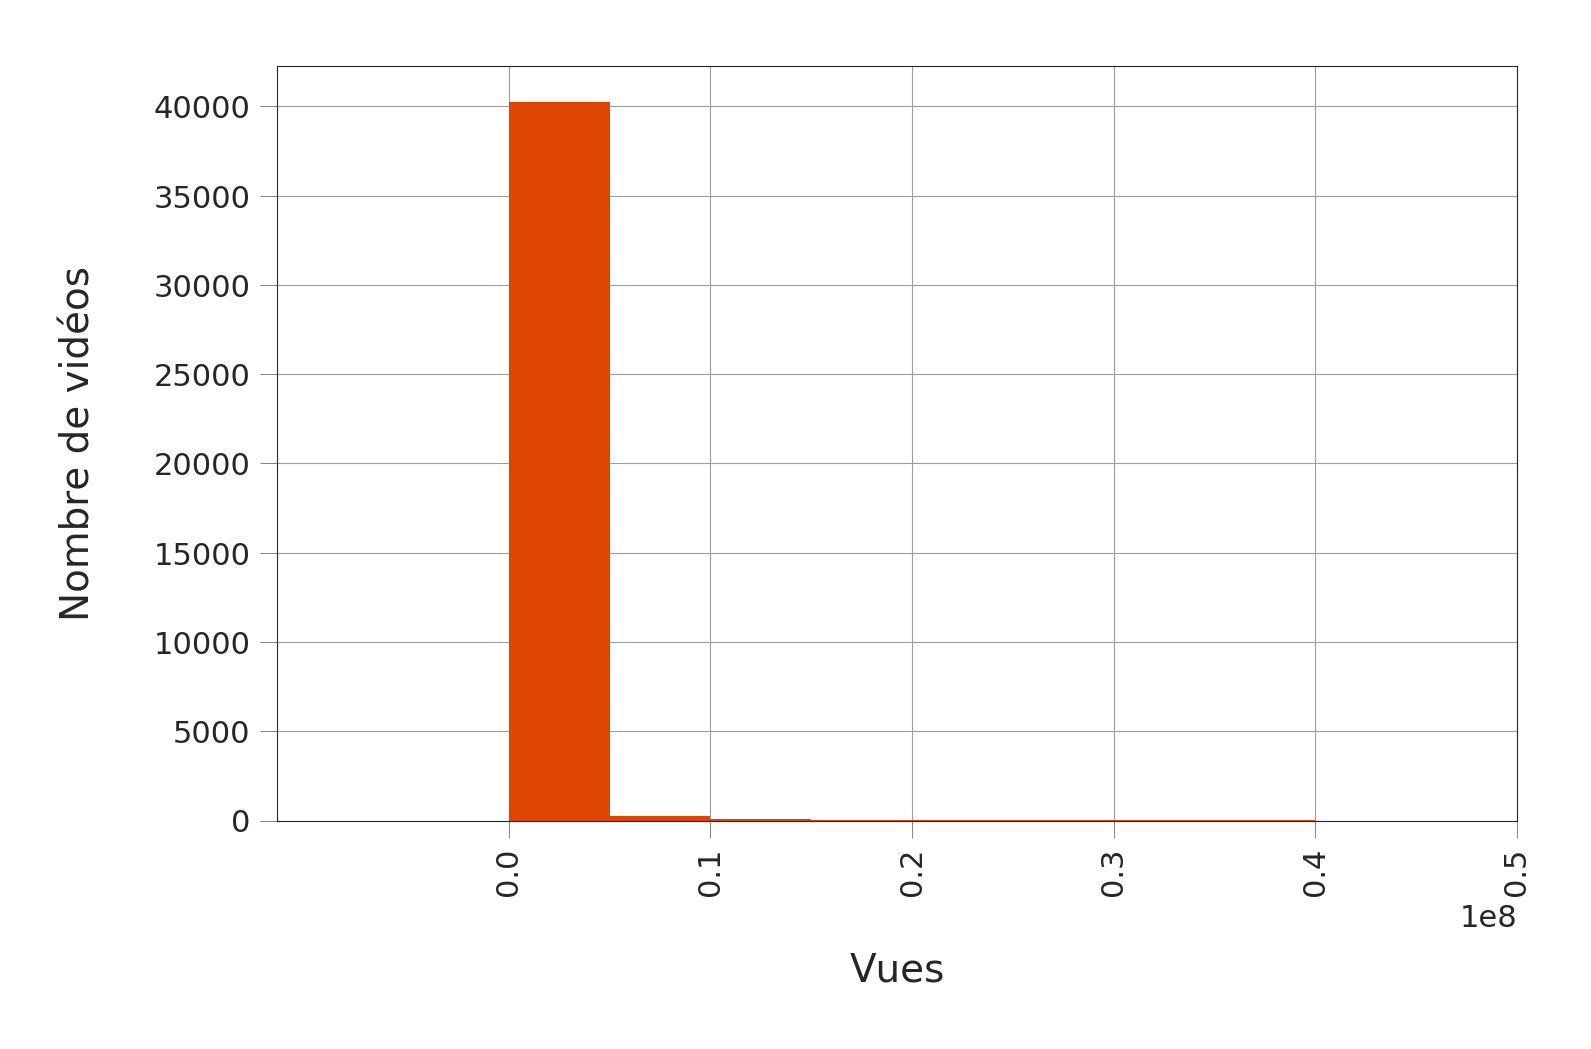

In [159]:
fig, ax = plt.subplots()
_ = sns.distplot(data_set["views"], kde=False, color='#de4600', 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Vues", ylabel="Nombre de vidéos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=0.5e8)
_ = plt.xticks(rotation=90)

La grande majoritée des vidéos font moins que `5 000 000` de vues. On obtient ce chiffre grâce à la formule suivante :
\begin{align}
\frac{0.1 \times 10^8}{2} = 5 \times 10^6
\end{align}
Nous allons tracer un histogramme pour les vidéos avec 25 millions de vues ou moins pour avoir une meilleure vue du coude qu'il y a sur la colonne `views`. 

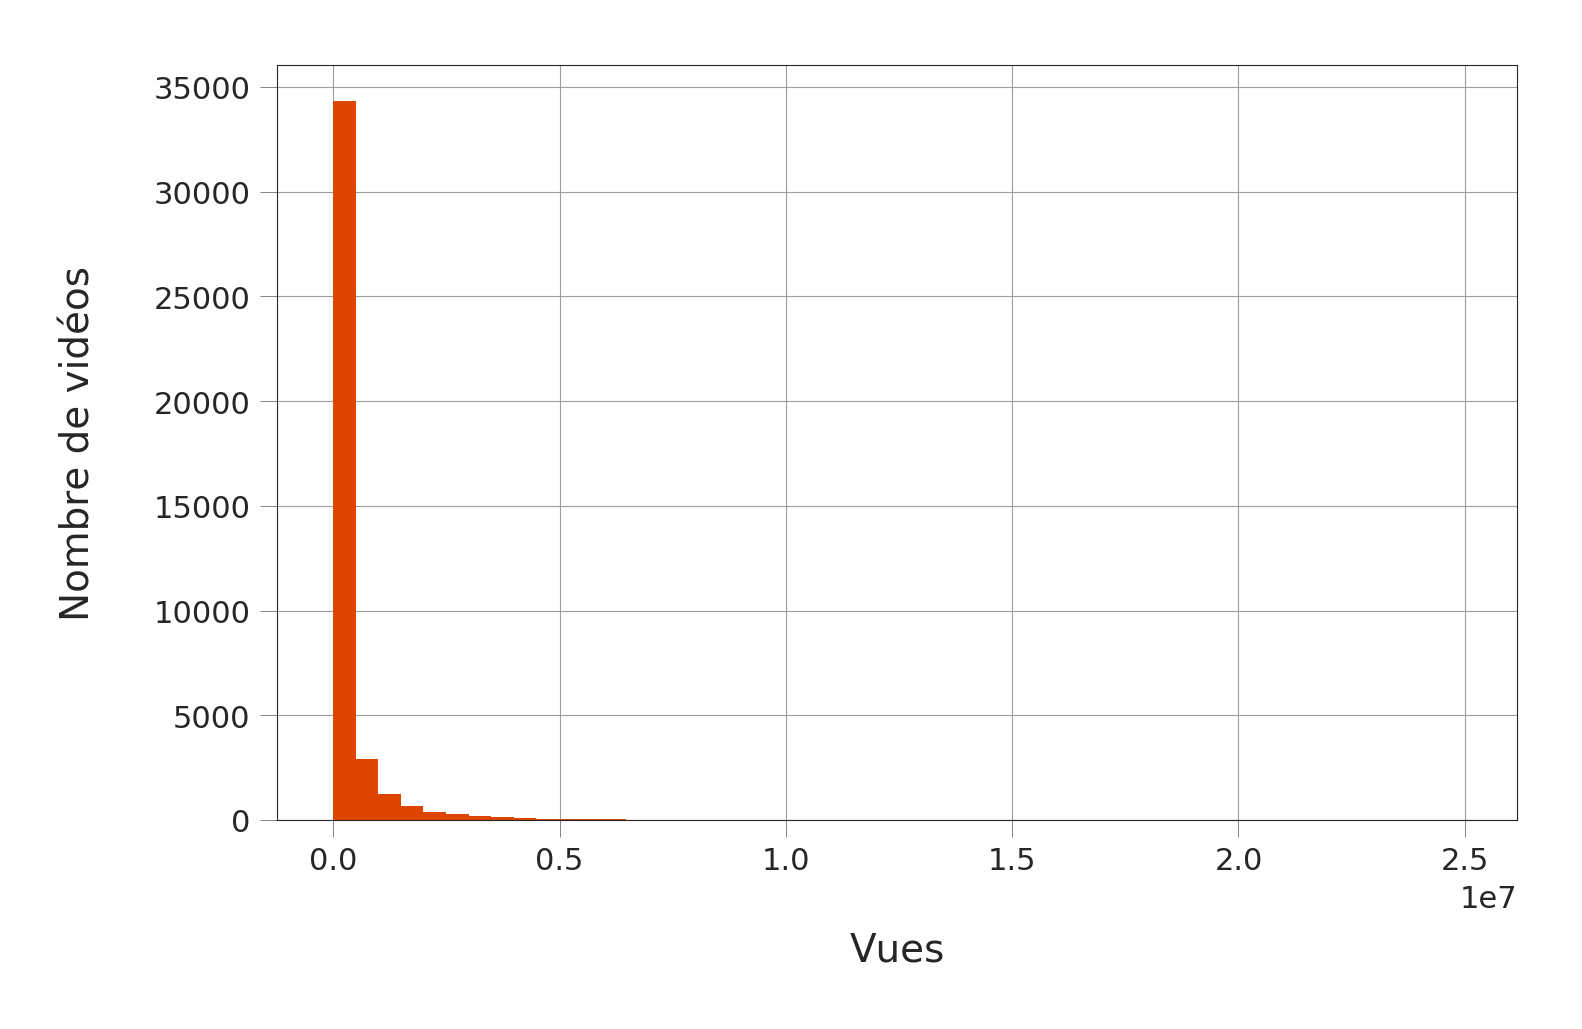

In [160]:
fig, ax = plt.subplots()
_ = sns.distplot(data_set[data_set["views"] < 25e6]["views"], kde=False, 
                 color='#de4600', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Vues", ylabel="Nombre de vidéos")

Now we see that the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views
Nous pouvons voir que l'écrasante majoritée a entre `0` et `500 000` vues. Nous allons calculer le pourcentage des vidéos qui ont moins de `500 000` vues.

In [161]:
data_set[data_set['views'] < 5e5]['views'].count() / data_set['views'].count() * 100 # Moins de 500 000

84.33601807288086

In [162]:
data_set[data_set['views'] < 1.5e6]['views'].count() / data_set['views'].count() * 100 # Moins de 1 500 000

94.51183577251744

In [163]:
data_set[data_set['views'] < 5e6]['views'].count() / data_set['views'].count() * 100 # Moins de 5 000 000

98.8802671643257

In [164]:
data_set[data_set['views'] < 10e6]['views'].count() / data_set['views'].count() * 100 # Moins de 10 000 000

99.51134466162459

* `84,3%` des vidéos en tendance en moins de `500 000` vues,
* `94,5%` des vidéos en moins de `1 500 000` vues et
* `98,9%` des vidéos en moins de `5 000 000` vues. Enfin, `99,5%` des vidéos en moins de `10 000 000` vues. 
 
 On retrouve donc `15%` des vidéos qui ont plus de `500 000` vues. D'un point de vue échelle de YouTube, il ne faut pas énormément de vues pour être en tendance. Il n'est pas necéssaire de faire des millions de vues, comme on l'entend souvent, pour faire le buzz mais seulement un demi-million de vues suffisent dans ce cas-là. 



### Histogramme des likes
Nous allons tracer un histogramme pour voir la distribution de la colonne `likes`. L'utilisateur sur une vidéo peut laisser un `like` pour ainsi dire qu'il a aimé le contenu de la vidéo. Si, au contraire, il n'a pas aimé le contenu de la vidéo, alors il peut laisser un `dislike`.

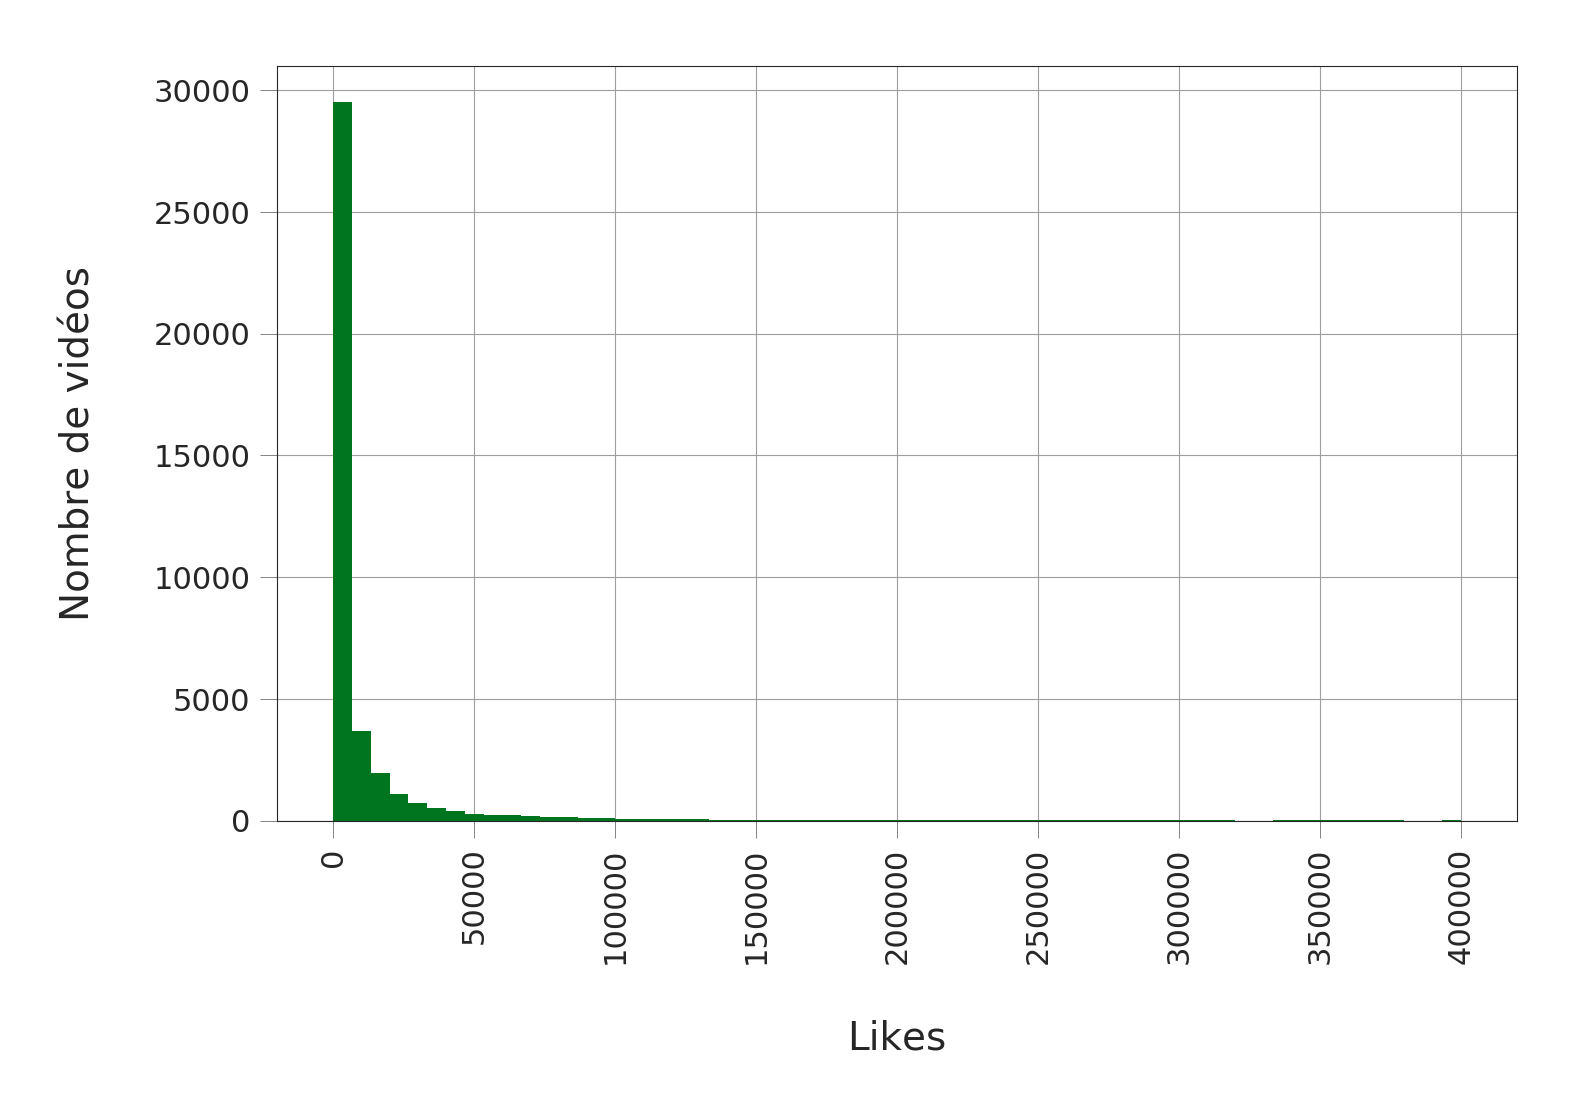

In [165]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(data_set["likes"], kde=False, 
                 color='#00751f', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 4e5, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="Nombre de vidéos")
_ = plt.xticks(rotation=90)

Nous pouvons noter que la majorité des vidéos ont entre `0` et `50 000` likes environ. Nous allons réajuster le graphique pour ne voir que la partie qui nous intéresse. C'est à dire entre `0` et `50 000` likes.

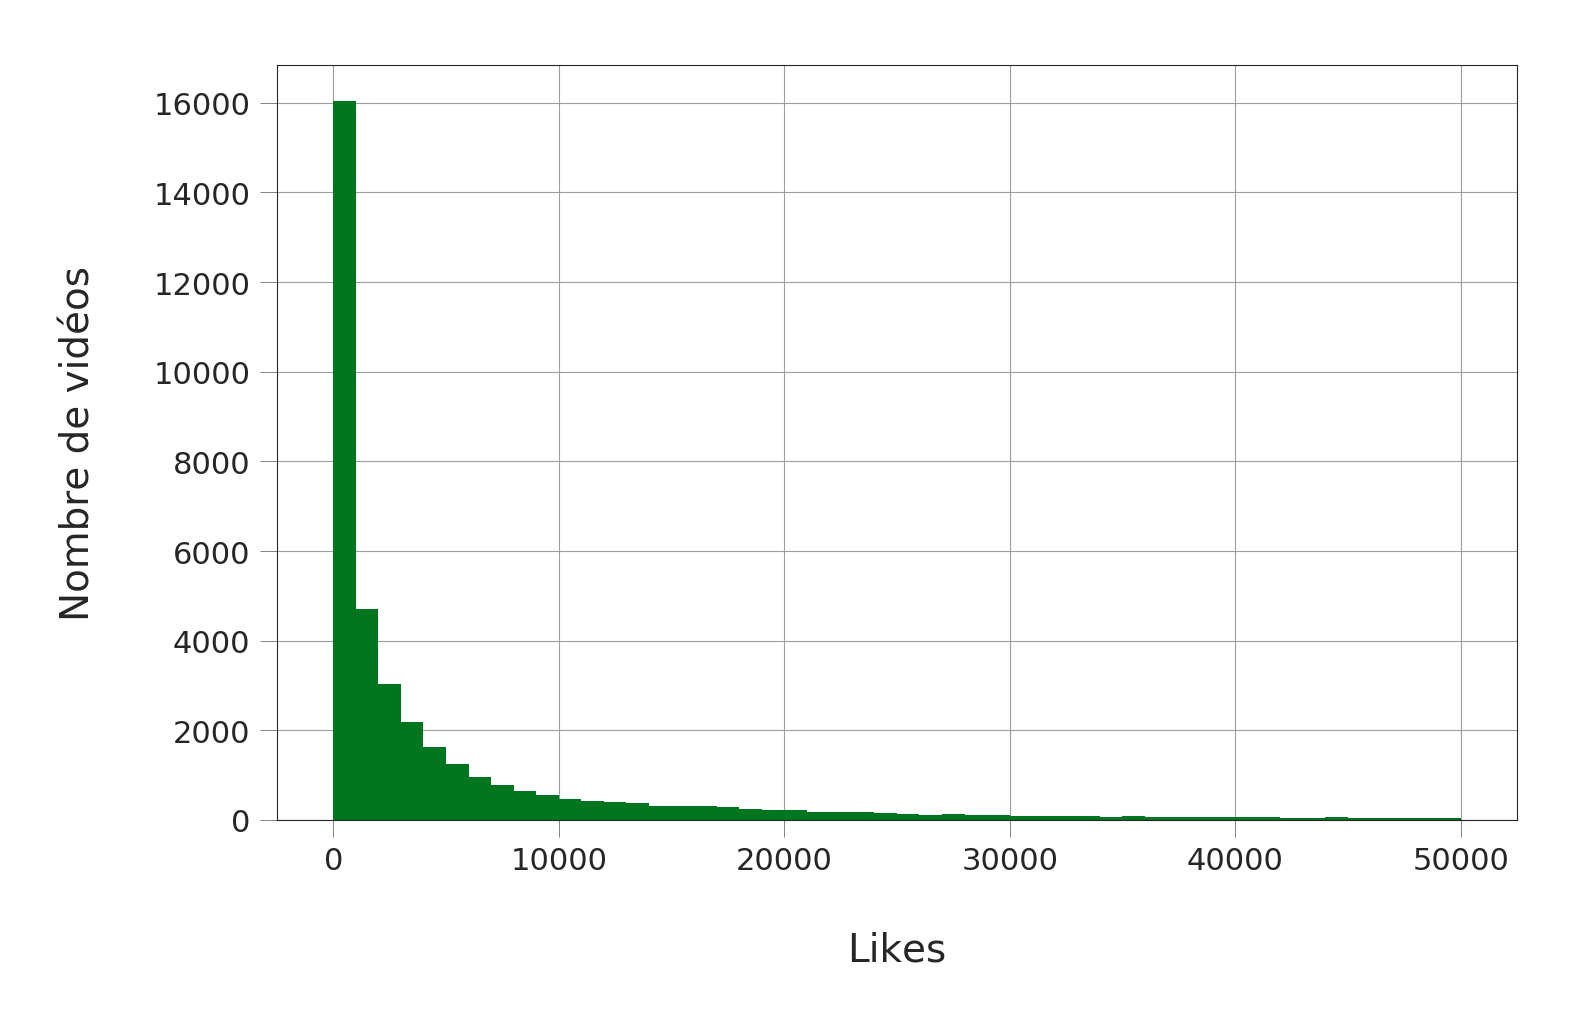

In [166]:
fig, ax = plt.subplots()
_ = sns.distplot(data_set[data_set["likes"] <= 5e4]["likes"], kde=False, 
                 color='#00751f', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="Nombre de vidéos")

Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.

Let's see the exact percentage of videos with less than 40000 likes

Nous pouvons voir que la majorité des vidéos ont `20 000` likes ou moins avec un pique entre `0` et `1000` likes. Nous allons voir maintenant le pourcentage de vidéos qui ont moins de `20 000` likes.

In [167]:
data_set[data_set['likes'] < 2e4]['likes'].count() / data_set['likes'].count() * 100 # Moins de 20000

86.36676161477261

In [168]:
data_set[data_set['likes'] < 1e4]['likes'].count() / data_set['likes'].count() * 100 # Moins de 10000

78.03997642667714

In [169]:
data_set[data_set['likes'] < 5e4]['likes'].count() / data_set['likes'].count() * 100 # Moins de 50000

93.38719182791473

* `86.4%` des vidéos ont moins de **20 000 likes**
* `78%` des vidéos ont moins de **10 000 likes**
* `93.4%` des vidéos ont moins de **50 000 likes**

Rapellons que `84%` des vidéos ont moins de **500 000 vues** et `86%` des vidéos ont moins de **20 000 likes**. Cela signifie qu'il y a environ **20 000 likes** pour une vidéo qui e entre `0` et **`500 000` vues**

In [170]:
data_set[data_set["likes"] <= 2e4].head(10)

video_id trending_date  \
1   Yo84eqYwP98      17.14.11   
4   ee6OFs8TdEg      17.14.11   
5   teXaL6GdQRk      17.14.11   
6   nduL7G_gJoY      17.14.11   
7   QmpWE_SODZA      17.14.11   
9   0RFhWyM6qbA      17.14.11   
10  LhjhGOBIoHM      17.14.11   
13  JfanclGyrZY      17.14.11   
14  PpECwr15oQQ      17.14.11   
15  ZTTpRHC5ZH4      17.14.11   

                                                title          channel_title  \
1   LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...                Le Labo   
4   QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...      Aurelien Fontenoy   
5   STRANGER JOKES : Jokes de Papa avec les teens ...  Le Jeu, C'est Sérieux   
6   De retour dans le Manoir hanté avec le Grand J...            silent jill   
7   T'es qui toi ? Squeezie, le youtubeur aux 4 mi...   Salut les terriens !   
9   Benzema balance ses dur vérités Deschamps et L...               HALIRIPA   
10  Jérémy Ferrari - On n'est pas couché 11 novemb...    On n'est pas couché   
13                 L'incroyable Joyau de François 1er              Nota Bene   
14                                 Cocovoit - M comme               Cocovoit   
15              Une nouvelle lune - La Petite Mort #4               Studio 4   

    category_id              publish_time  \
1            24  2017-11-12T15:00:02.000Z   
4            17  2017-11-13T16:30:03.000Z   
5            23  2017-11-13T15:48:57.000Z   
6            24  2017-11-12T19:00:08.000Z   
7            24  2017-11-13T17:30:01.000Z   
9            22  2017-11-12T20:16:45.000Z   
10           24  2017-11-12T00:53:02.000Z   
13           27  2017-11-13T11:00:23.000Z   
14           23  2017-11-13T17:16:37.000Z   
15           23  2017-11-12T14:00:02.000Z   

                                                 tags   views  likes  \
1                                              [none]  432721  14053   
4   vélo"|"vtt"|"bmx"|"freestyle"|"bike"|"mtb"|"di...  141695   8091   
5   Stranger Jokes"|"Jokes de Papa"|"Stranger Thin...  141253  14354   
6   fantome"|"esprits"|"spiritisme"|"hanté"|"ouija...  187654   9286   
7   salut les terriens"|"squeezie"|"jeux videos"|"...   91051   1674   
9   Karim benzema football"|"Benzema vs cristiano ...  635236   5945   
10  onpc"|"on n'est pas couche"|"laurent ruquier"|...  294065      0   
13  Nota Bene"|"françois 1er"|"histoire"|"livre d'...   53248   5164   
14  cocovoit"|"et bim"|"humour"|"covoiturage"|"drô...   55313   4153   
15  nouvelles écritures"|"studio 4"|"france télévi...  172608   8163   

    dislikes  comment_count                                  thumbnail_link  \
1        576           1161  https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg   
4         72            481  https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg   
5        202            417  https://i.ytimg.com/vi/teXaL6GdQRk/default.jpg   
6       1381           2419  https://i.ytimg.com/vi/nduL7G_gJoY/default.jpg   
7       1903            701  https://i.ytimg.com/vi/QmpWE_SODZA/default.jpg   
9        722           1483  https://i.ytimg.com/vi/0RFhWyM6qbA/default.jpg   
10         0              0  https://i.ytimg.com/vi/LhjhGOBIoHM/default.jpg   
13        43            234  https://i.ytimg.com/vi/JfanclGyrZY/default.jpg   
14        97            396  https://i.ytimg.com/vi/PpECwr15oQQ/default.jpg   
15        95            237  https://i.ytimg.com/vi/ZTTpRHC5ZH4/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed  \
1               False             False                   False   
4               False             False                   False   
5               False             False                   False   
6               False             False                   False   
7               False             False                   False   
9               False             False                   False   
10               True              True                   False   
13              False             False                   False   


On peut le voir sur ce tableau : quasiment toutes les vidéos qui ont moins de `20 000` likes ont moins de `500 000` vues

### Nombre de commentaire sous forme d'histogramme

Nous allons tracer un histogramme pour voir la distribution de la colonne `comment_count`. Les commentaires constituent une donnée importante dans le cadre de l'interaction entre le créateur et sa communauté.

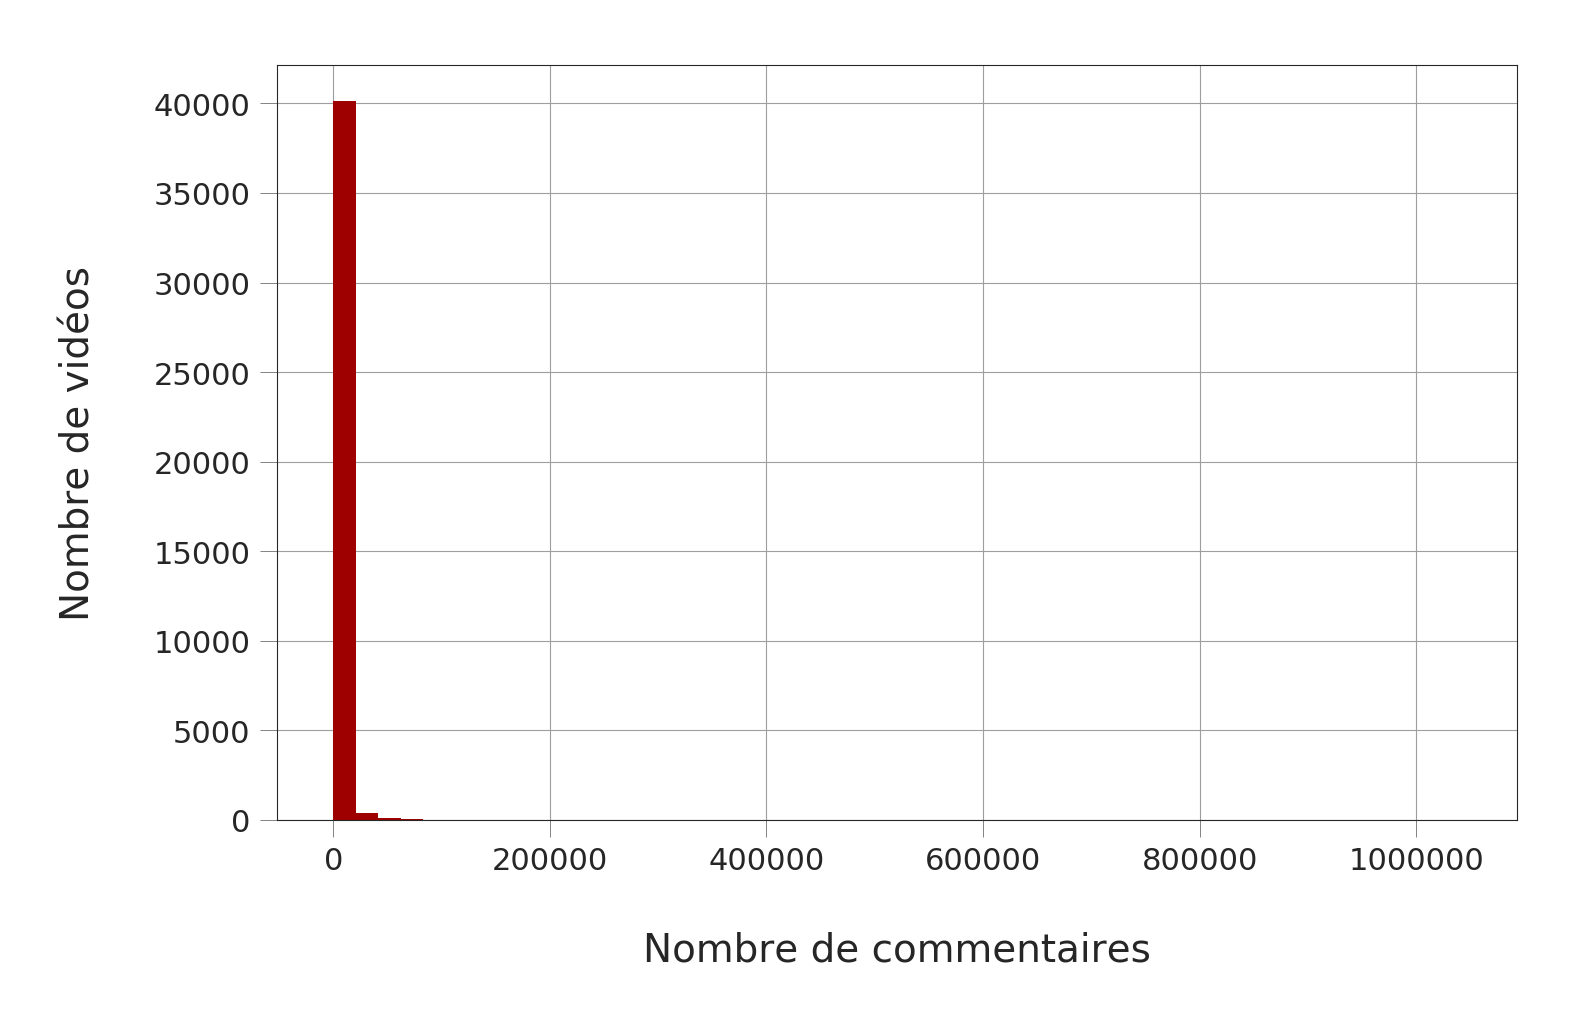

In [171]:
fig, ax = plt.subplots()
_ = sns.distplot(data_set["comment_count"], kde=False, rug=False, 
                 color='#9e0000', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Nombre de commentaires", ylabel="Nombre de vidéos")

Nous allons faire un zoom sur le graphique entre `0` et `100 000` commentaires.

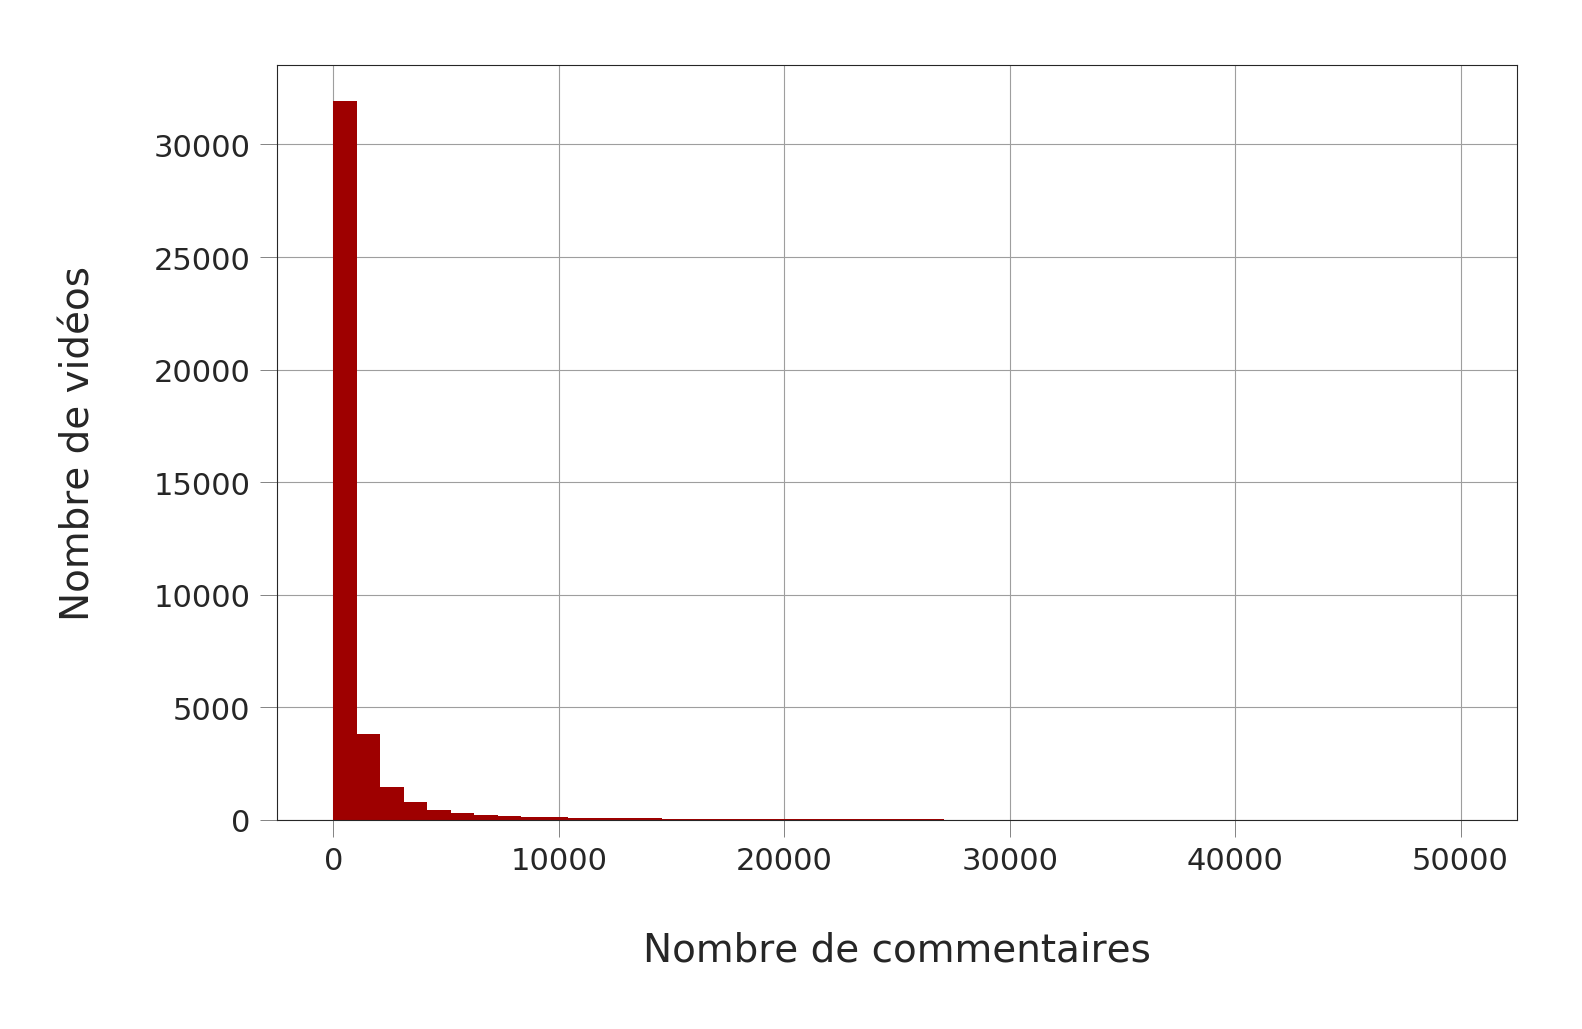

In [172]:
fig, ax = plt.subplots()
_ = sns.distplot(data_set[data_set["comment_count"] < 50000]["comment_count"], kde=False, rug=False, 
                 color='#9e0000', hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 5e4, 49), ax=ax)
_ = ax.set(xlabel="Nombre de commentaires", ylabel="Nombre de vidéos")

Les vidéos tendances ont en moyenne

\begin{align}
\frac{10 000}{10} \approx 1000 \text{ commentaires}
\end{align}

Nous avons compté le nombre de barres dans l'histogramme entre `0` et `10 000` commentaires.
 
Nous allons voir quel est le pourcentage des vidéos qui ont moins de `10000` commentaires.



In [173]:
data_set[data_set['comment_count'] < 1000]['comment_count'].count() / data_set['comment_count'].count() * 100 # Moins de 1000 commentaires

77.75022099990177

In [174]:
data_set[data_set['comment_count'] < 5000]['comment_count'].count() / data_set['comment_count'].count() * 100 # Moins de 5000 commentaires

94.34485806895196

In [175]:
data_set[data_set['comment_count'] < 10000]['comment_count'].count() / data_set['comment_count'].count() * 100 # Moins de 10 000 commentaires

96.79304586975739

* `77.8%` des vidéos ont moins de **1 000 commentaires**
* `94.3%` des vidéos ont moins de **5 000 commentaires**
* `96.8%` des vidéos ont moins de **10 000 commentaires**


# Analyse des données non-numériques

Nous allons analyser les variables avec des données qualitatives.

In [176]:
data_set.describe(include = ['O'])

video_id trending_date  title   channel_title  \
count         40724         40724  40724           40724   
unique        30581           205  30544            6680   
top     Rter-Np-Td0      18.27.04    J+1  Troom Troom FR   
freq              6           200     27             195   

                    publish_time    tags  \
count                      40724   40724   
unique                     29234   22903   
top     2017-12-15T17:00:04.000Z  [none]   
freq                          12    5304   

                                        thumbnail_link description  
count                                            40724       40724  
unique                                           30572       25003  
top     https://i.ytimg.com/vi/Rter-Np-Td0/default.jpg              
freq                                                 6        2912

Nous pouvons voir qu'il n'y a que `205` jours uniques sur notre jeu de données. Cela veut dire que nous avons des données de `205` jours des tendances YouTube.

Sur la colonne `video_id`, il y a `40724` vidéos et `30581` qui sont uniques. Cela veut dire que certaines vidéos restent plusieurs jours en tendance YouTube. Le titre qui apparaît le plus de fois est `J+1` qui apparaît `27` fois dans notre jeu de données. Il y a une anomalie : Si il y a `30581` vidéos uniques, alors il devrait y avoir `30581` différents. Une interprétation possible : la vidéo a disparu des tendances et est revenue en tendance avec un titre différent ou une description différente. La colonne `publish_time` a `29234` valeurs uniques mais cela est logique si 2 vidéos sont publiées au même moment.

Pour vérifier notre interprétation de la colonne `title`, prenons l'exemple d'une vidéo à tendance qui apparaît plus d'une fois dans la liste des vidéos en tendance mais avec des titres différents.

In [177]:
grouped = data_set.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

video_id trending_date                                     title  \
8463  -IBN1TQpQTU      17.26.12  SAPHIR LE PÈRE NOËL M'OFFRE UN CHEVAL !!   
8707  -IBN1TQpQTU      17.27.12         LE PÈRE NOËL M'OFFRE UN CHEVAL !!   

     channel_title  category_id              publish_time  \
8463    INZKITCHEN           24  2017-12-25T17:27:51.000Z   
8707    INZKITCHEN           24  2017-12-25T17:27:51.000Z   

                                                   tags  views  likes  \
8463  iNzKitchen"|"PERE"|"NOEL"|"OFFRIR"|"CHEVAL"|"S...  32994   3521   
8707  iNzKitchen"|"PERE"|"NOEL"|"OFFRIR"|"CHEVAL"|"S...  48317   4638   

      dislikes  comment_count                                  thumbnail_link  \
8463        35            303  https://i.ytimg.com/vi/-IBN1TQpQTU/default.jpg   
8707        59            336  https://i.ytimg.com/vi/-IBN1TQpQTU/default.jpg   

      comments_disabled  ratings_disabled  video_error_or_removed  \
8463              False             False                   False   
8707              False             False                   False   

                                            description  
8463  SAPHIR LE PÈRE NOËL M'OFFRE LE MEILLEUR DES CA...  
8707  SAPHIR LE PÈRE NOËL M'OFFRE LE MEILLEUR DES CA...

Nous pouvons voir que le titre a changé, la date de mise en tendance également et l'ID de la vidéo est résté le même. Cela confirme bien notre hypothèse :  Il est possible que le titre change d'un jour à l'autre.

## Combien de titres de vidéo en tendance contiennent un mot en majuscule?
Maintenant, nous voulons voir combien de titres de vidéo en tendances contiennent au moins un mot en majuscule (par exemple, COMMENT). Pour ce faire, nous allons ajouter une nouvelle variable (colonne) à notre jeu de donnée dont la valeur est «True» si le titre de la vidéo contient au moins un mot en majuscule, et «False» s'il n'en contient pas.

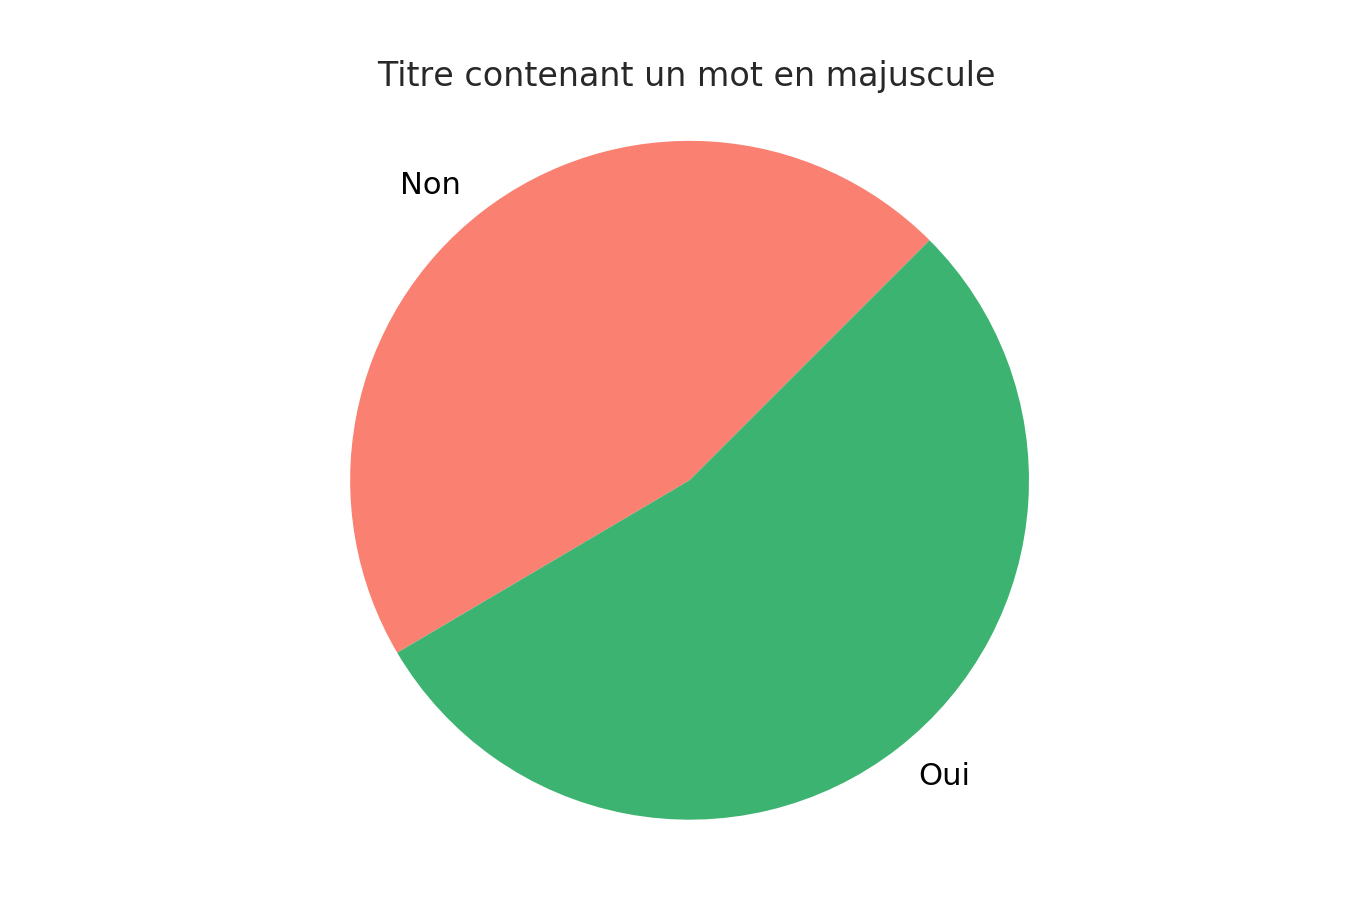

In [178]:
def contient_maj(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


data_set["contient_maj"] = data_set["title"].apply(contient_maj)

value_counts = data_set["contient_maj"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['Non', 'Oui'], 
           colors=['#FA8072', '#3CB371'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Titre contenant un mot en majuscule')

### Longeur des titres

Longeur des titre de video youtube.
Ajoutons une autre colonne à notre jeu de données pour représenter la longueur de chaque titre vidéo, puis a l'aide d'un histogramme nous aurrons une idée de cet population.


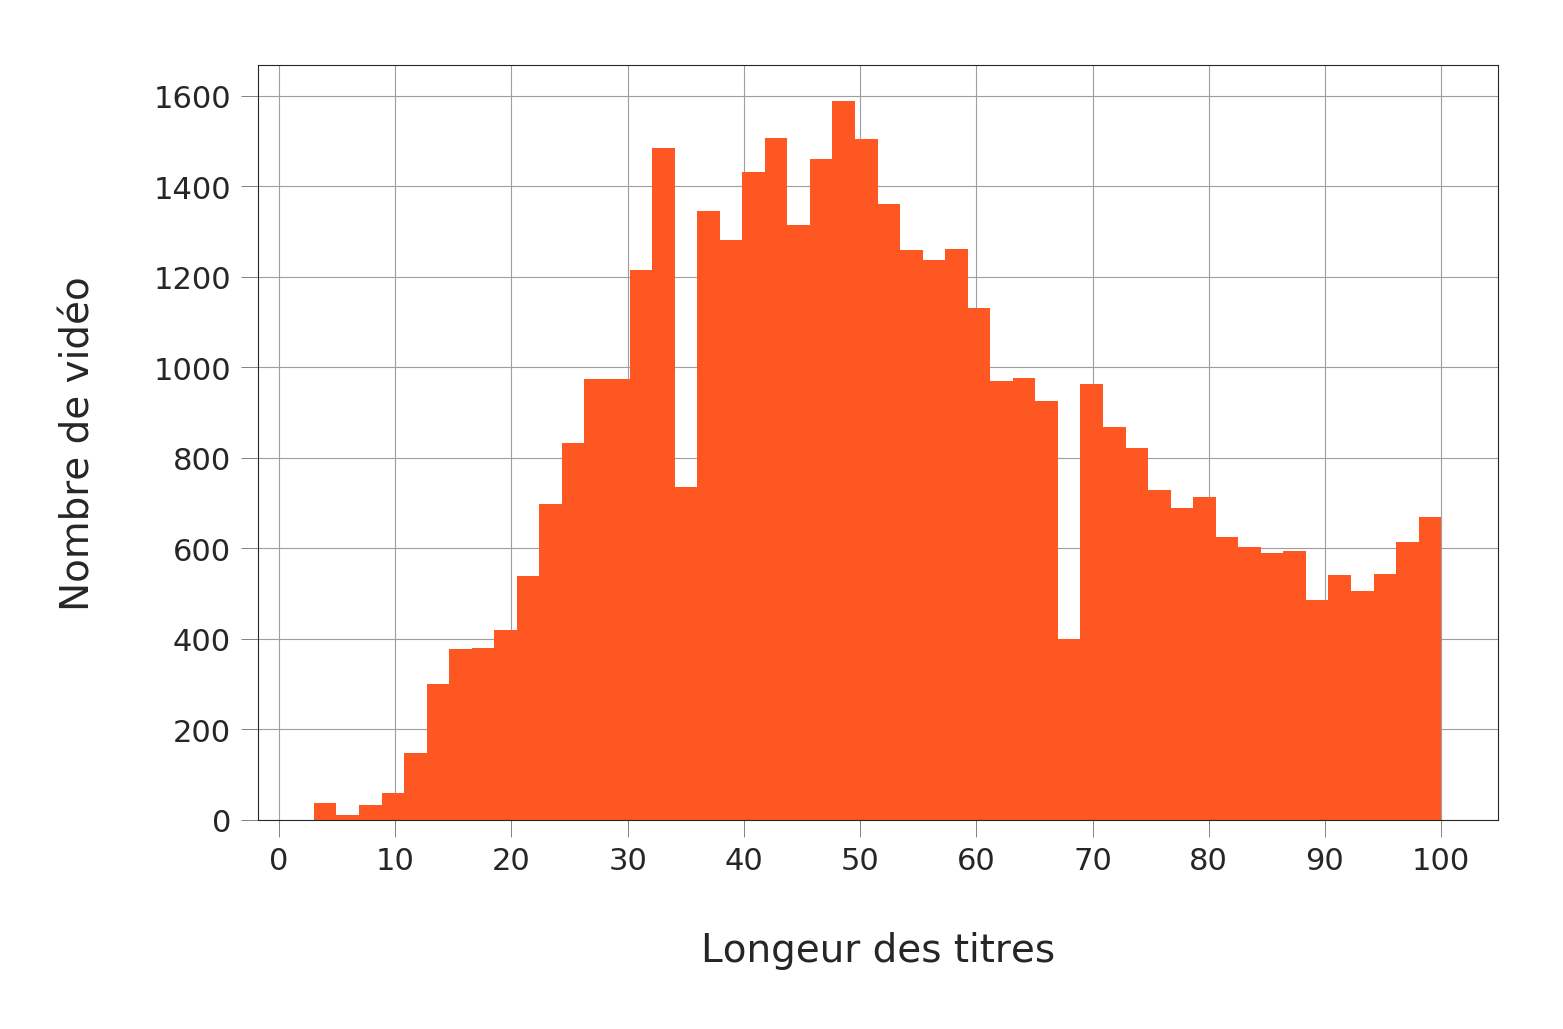

In [179]:
data_set["title_length"] = data_set["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(data_set["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[2], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Longeur des titres", ylabel="Nombre de vidéo", xticks=range(0, 110, 10))

Nous pouvons voir que la distribution de la longueur du titre ressemble à une distribution normale, où la plupart des vidéos ont des longueurs de titre comprises entre 30 et 60 caractères environ.

Maintenant, dessinons un nuage de points  entre la longueur du titre et le nombre de vues pour voir la relation entre ces deux variables.


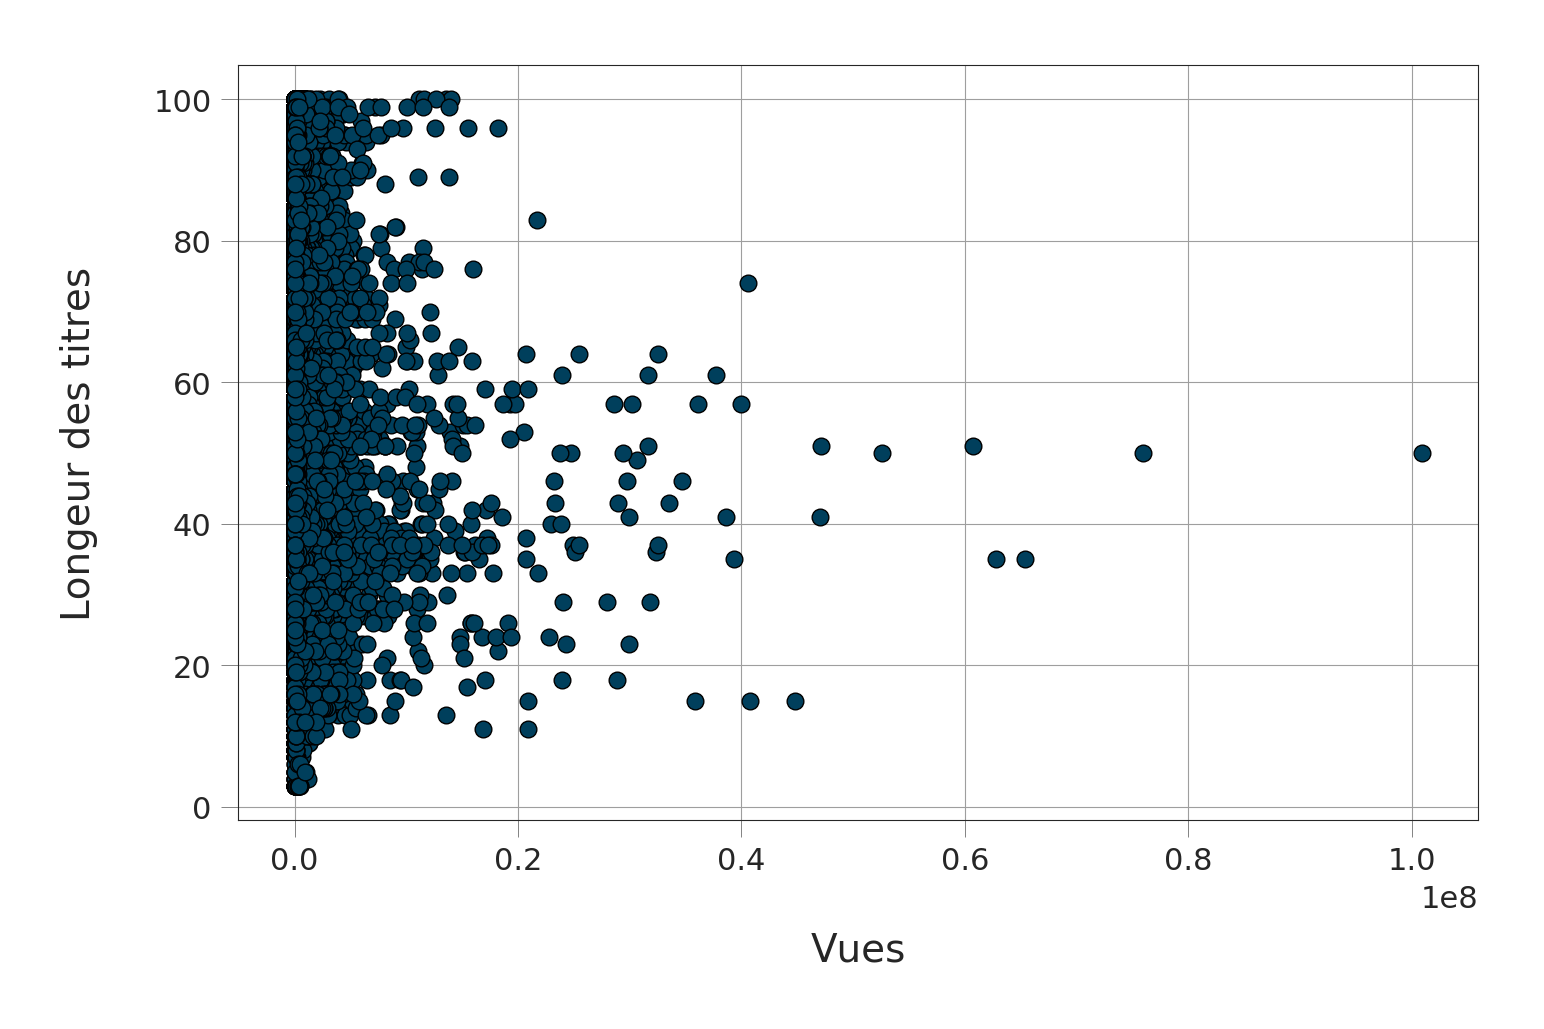

In [180]:
fig, ax = plt.subplots()
_ = ax.scatter(x=data_set['views'], y=data_set['title_length'], color=PLOT_COLORS[4], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Vues", ylabel="Longeur des titres")

En regardant le nuage de points, nous pouvons dire qu'il n'y a pas de relation entre la longueur du titre et le nombre de vues. Cependant, nous remarquons une chose intéressante: les vidéos qui ont `25 000 000` vues et plus ont une longueur de titre comprise entre `20` et `60` caractères environ.

## Carte Thermique
Maintenant, visualisons le tableau de corrélation ci-dessus à l'aide d'une carte thermique

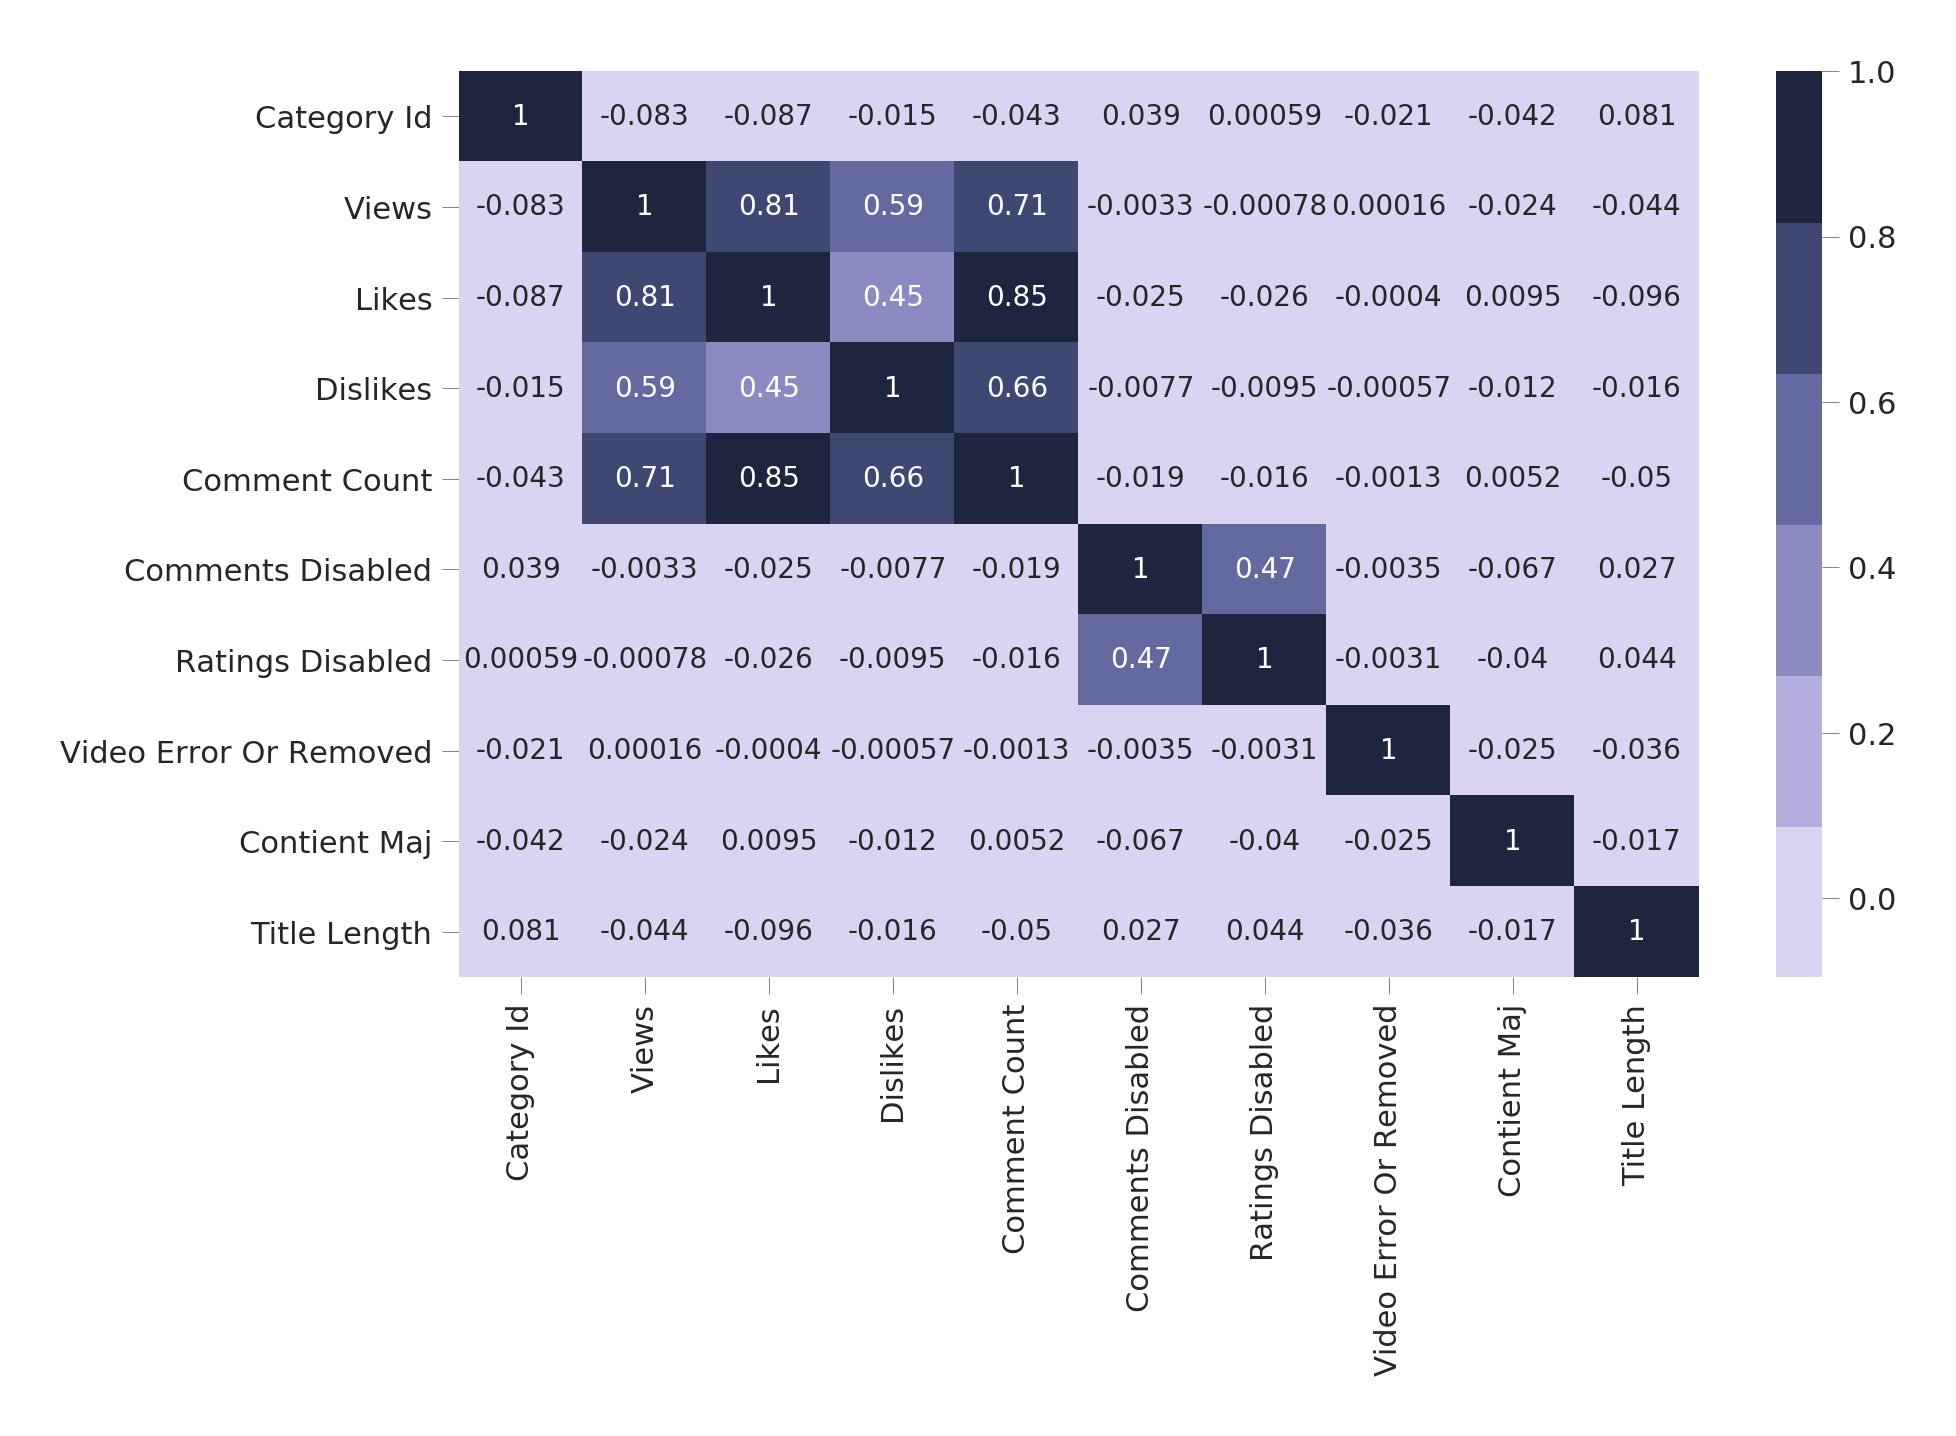

In [181]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(data_set.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(data_set.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(start=2.8, rot=.1), ax=ax)

Le tableau de corrélation ci-dessus indiquent que les vues et les goûts sont fortement corrélés positivement.
On parlera de goûts sur les actions des utilisateurs via les paramètres vues, like, dislike et commentaire.
Vérifions cela en traçant un nuage de points entre les vues et les like pour visualiser la relation entre ces variables

## Pair Plot des goûts

Nous avons récupéré les colonnes `views`, `likes` et `comment_count` pour les mettre ensemble dans un **pair plot**. L'objectif est de voir cette corrélation trouvée précédemment. 

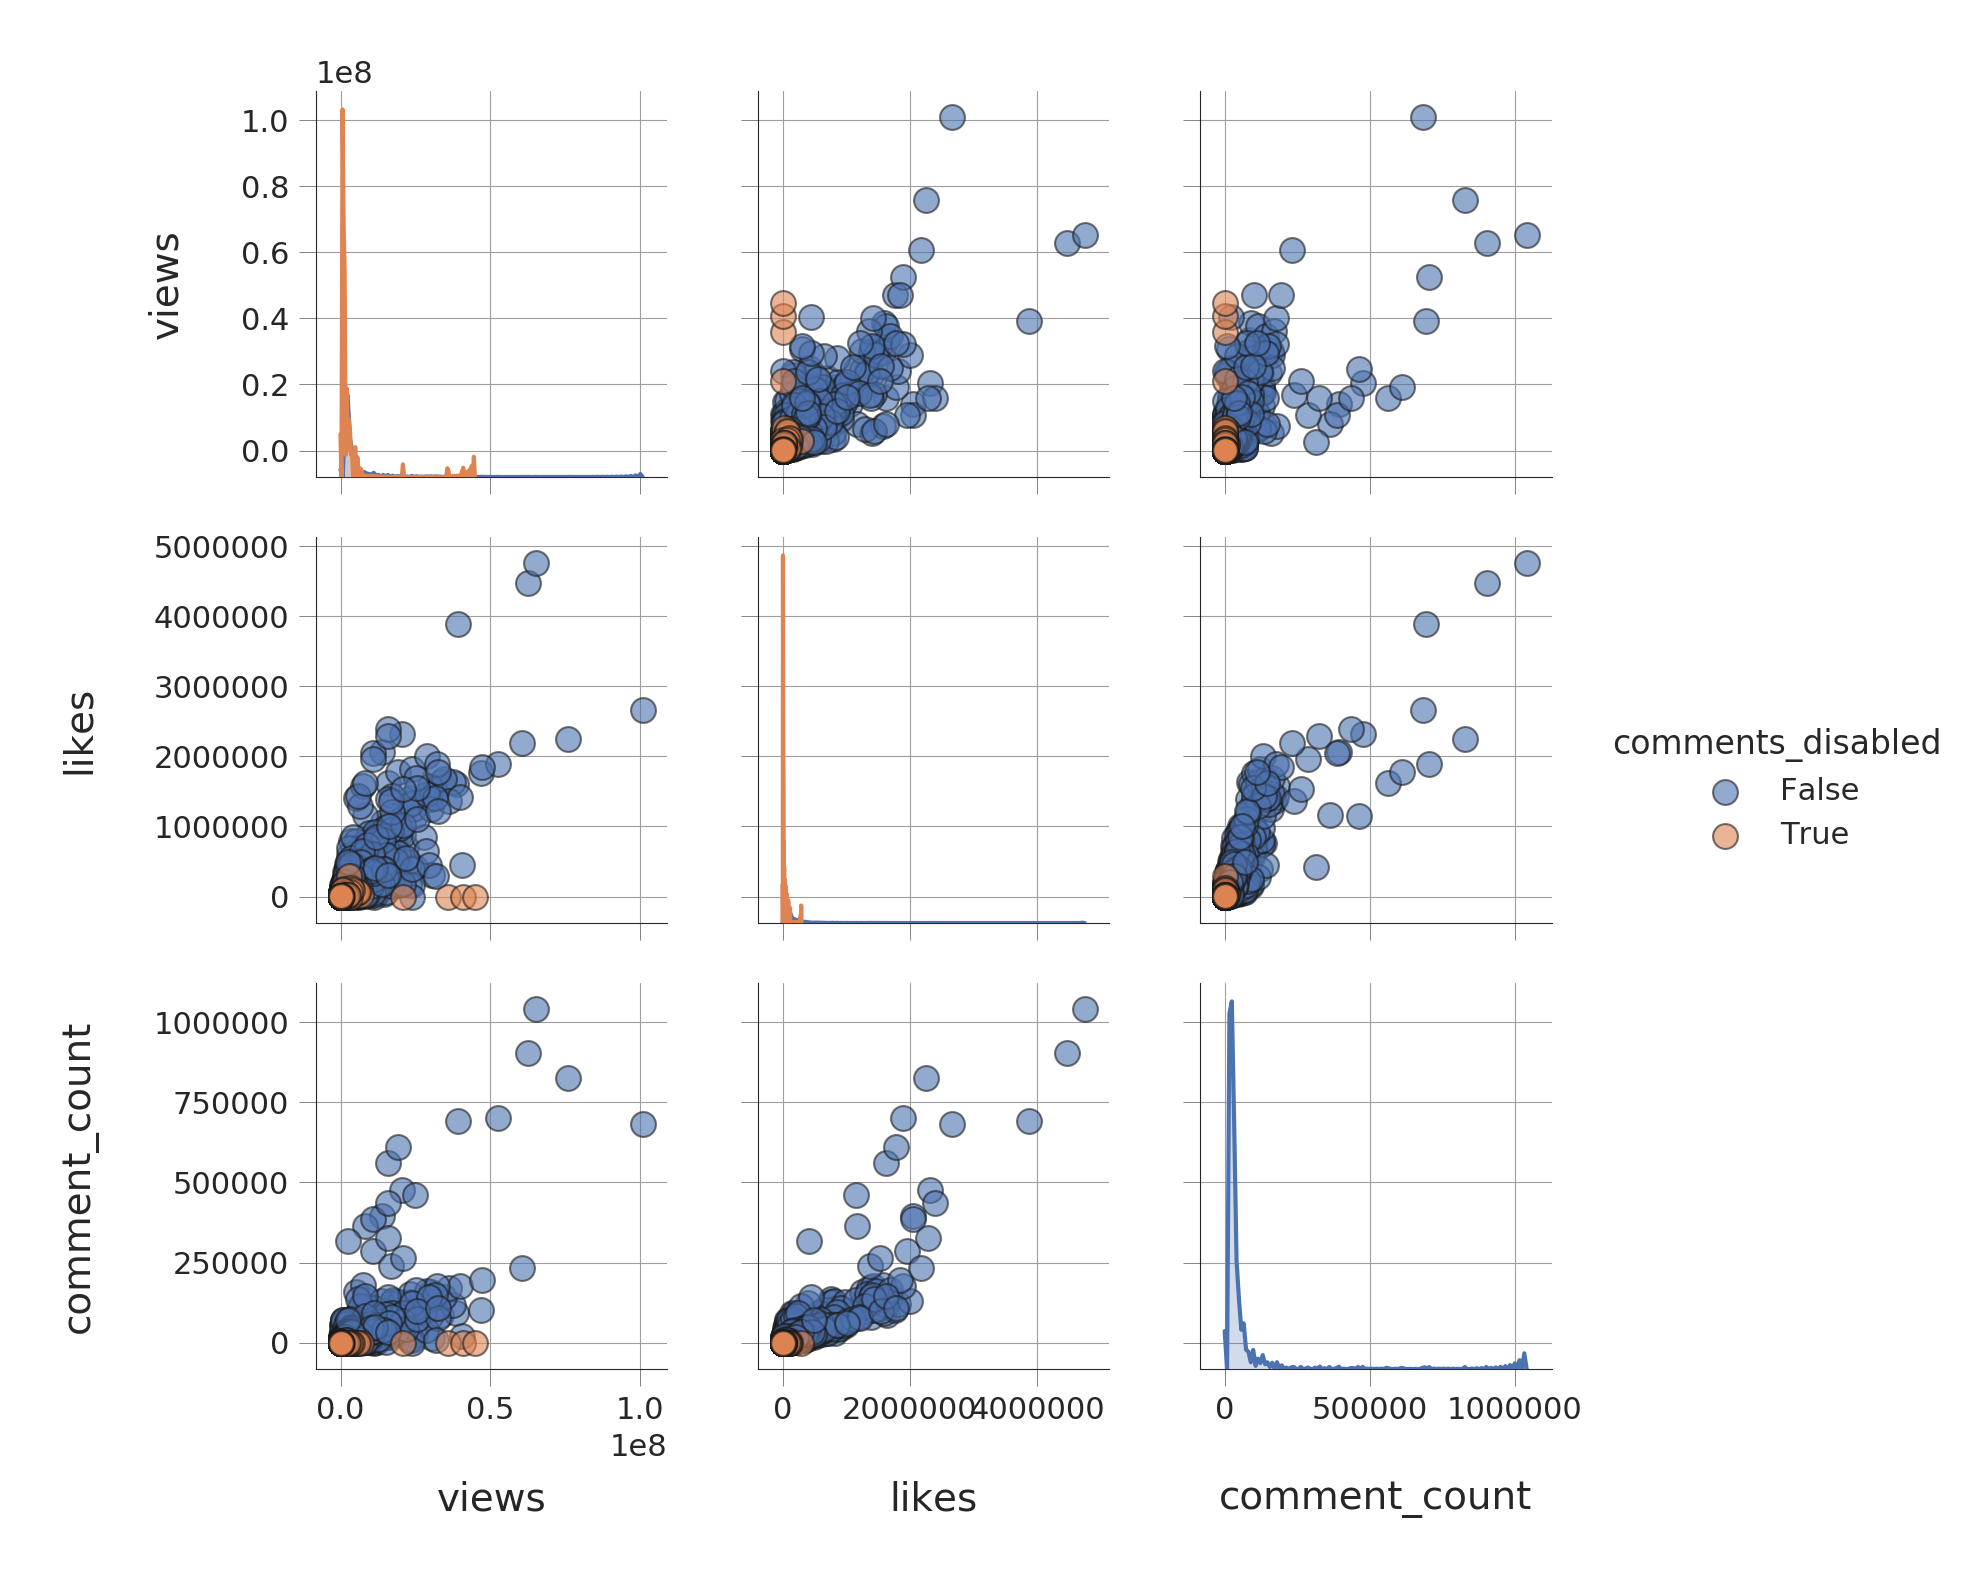

In [182]:
sns.pairplot(data_set, 
             vars = ['views', 'likes', 'comment_count'], 
             diag_kind = 'kde', 
             hue = 'comments_disabled',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'});

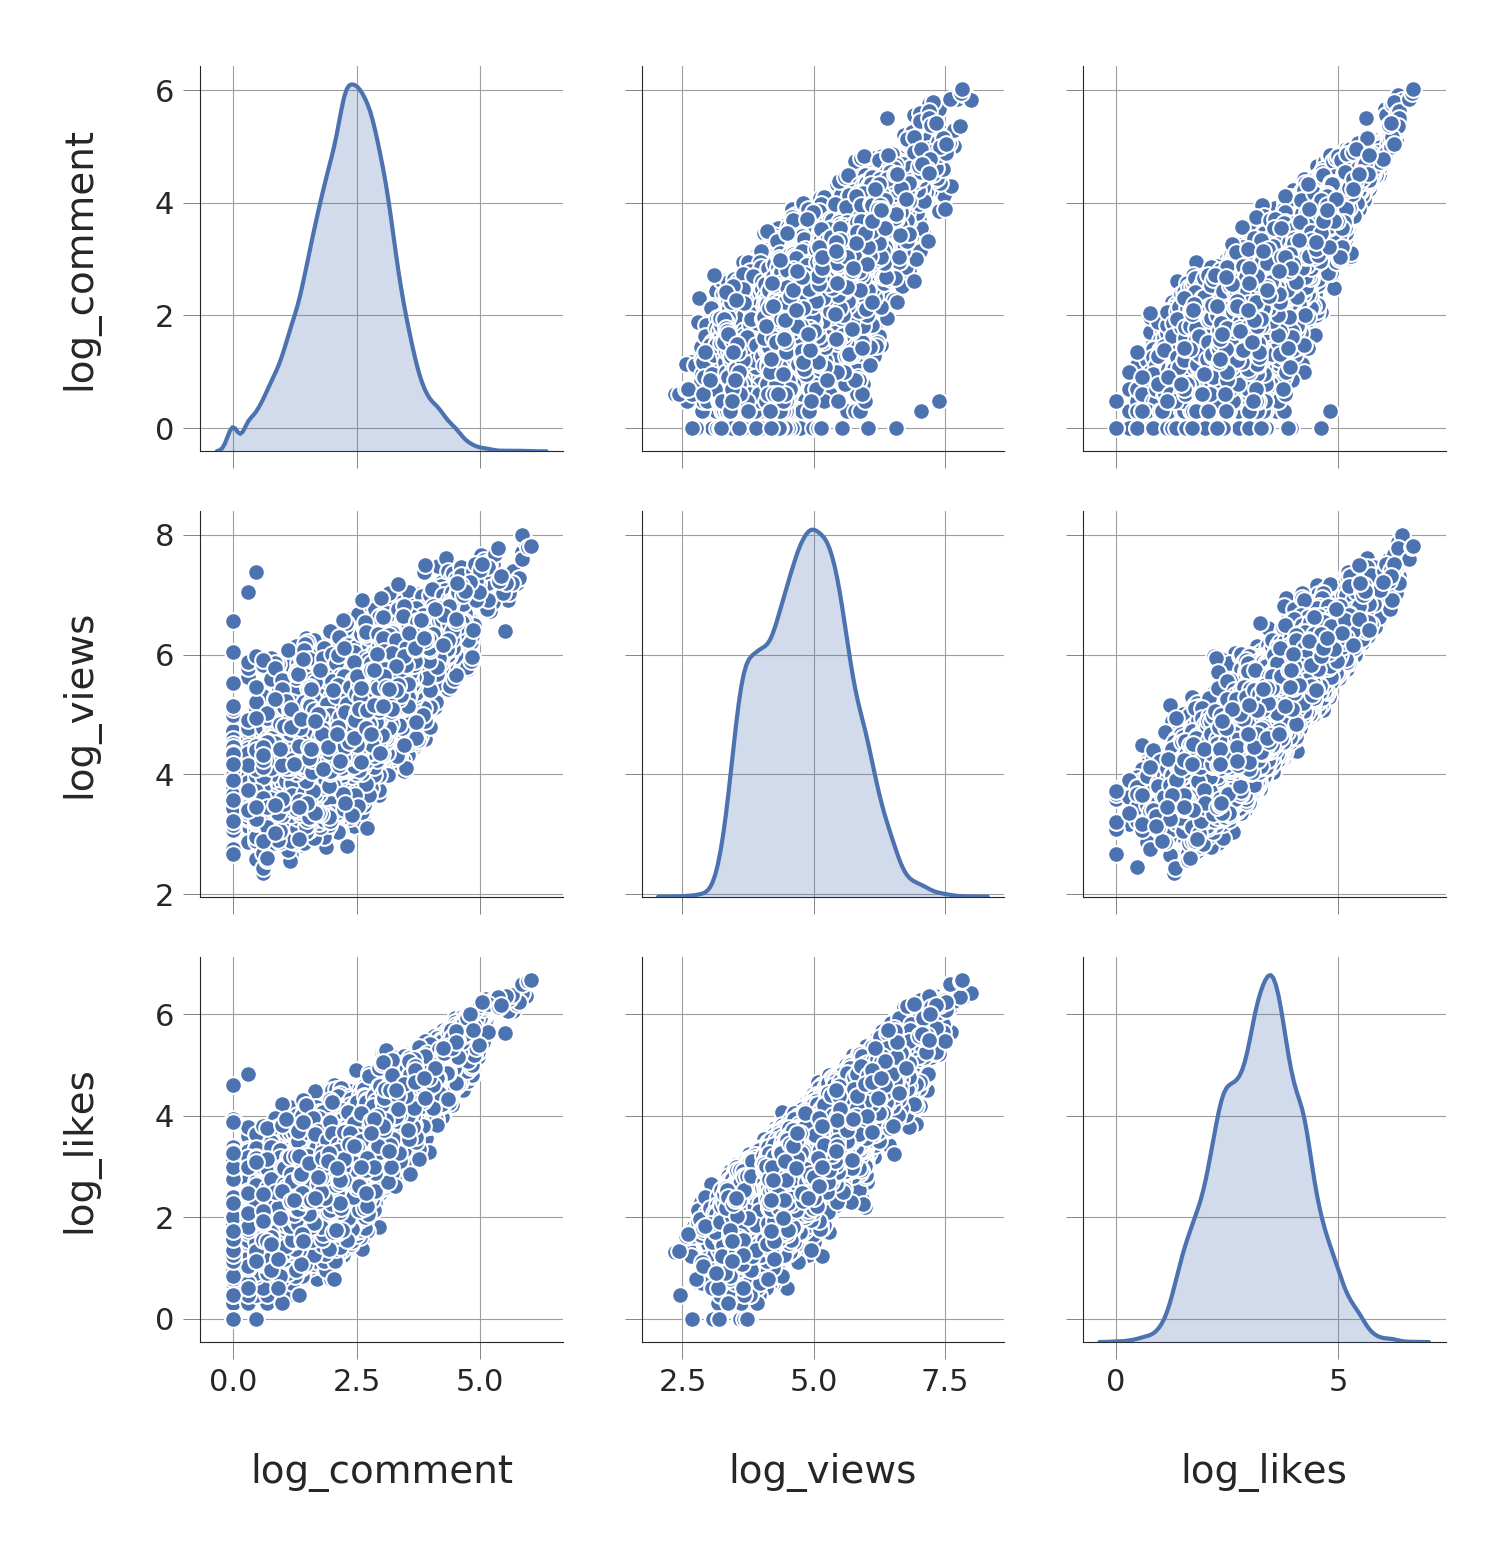

In [183]:
data_set['log_views'] = np.log10(data_set['views'])
data_set['log_likes'] = np.log10(data_set['likes'])
data_set['log_comment'] = np.log10(data_set['comment_count'])
sns.pairplot(data = data_set, vars =['log_comment', 'log_views', 'log_likes'],
             diag_kind = 'kde');

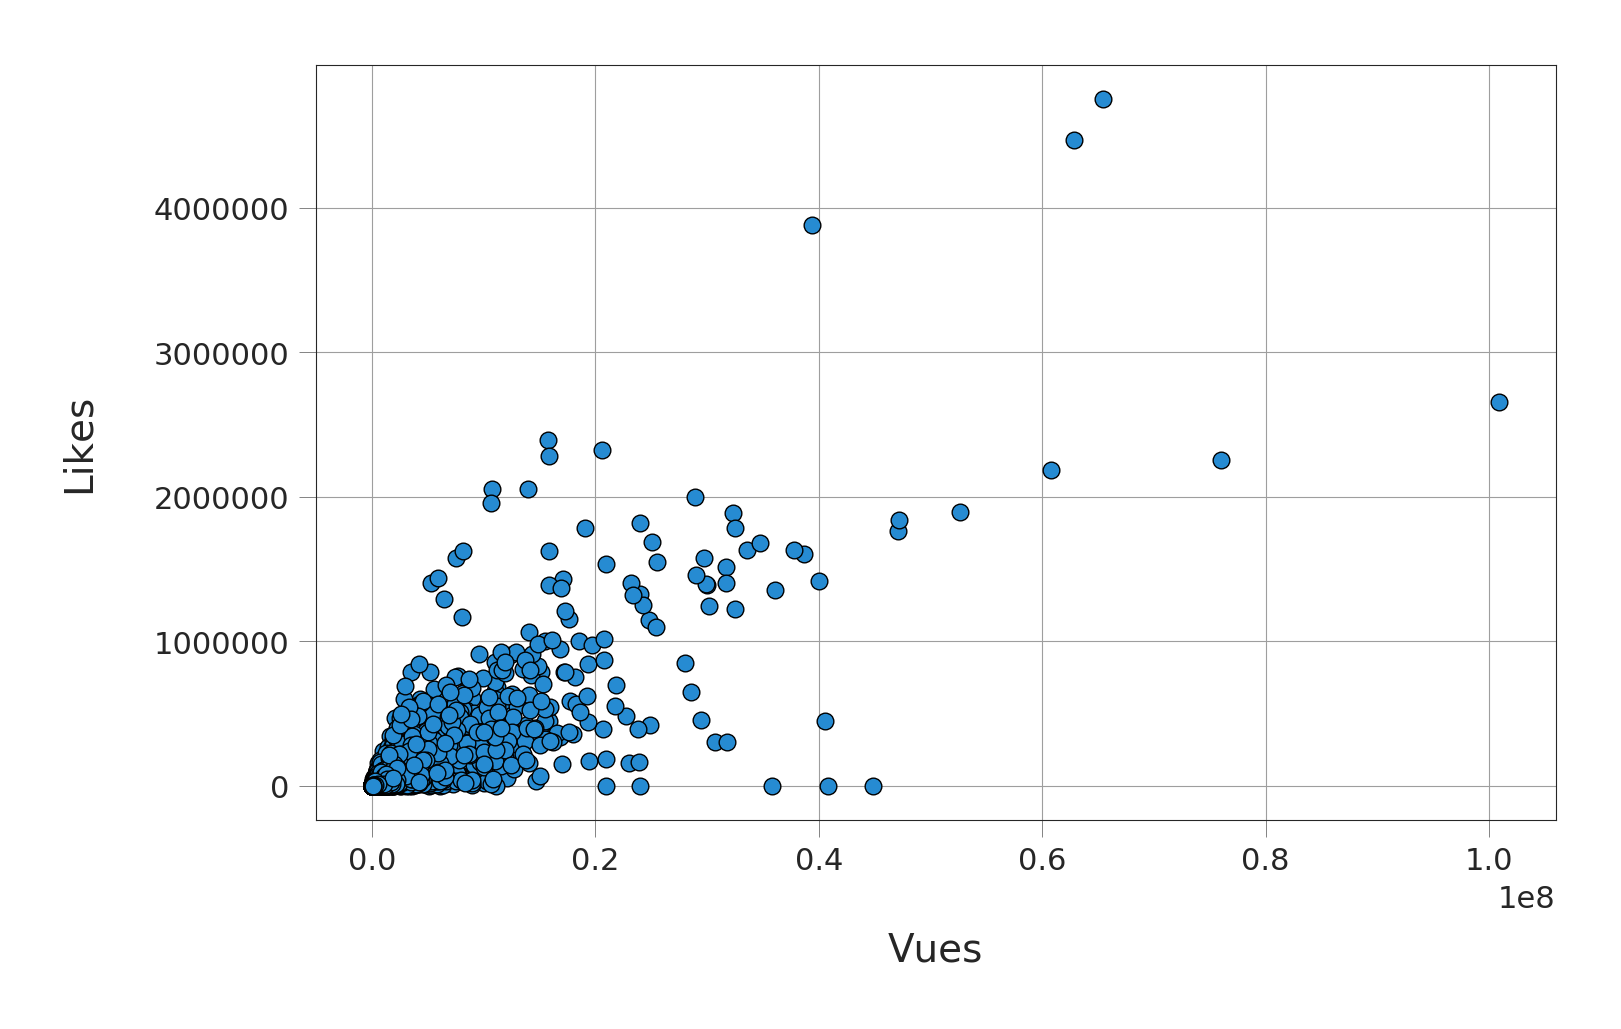

In [184]:
fig, ax = plt.subplots()
_ = plt.scatter(x=data_set['views'], y=data_set['likes'], color=PLOT_COLORS[0], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Vues", ylabel="Likes")

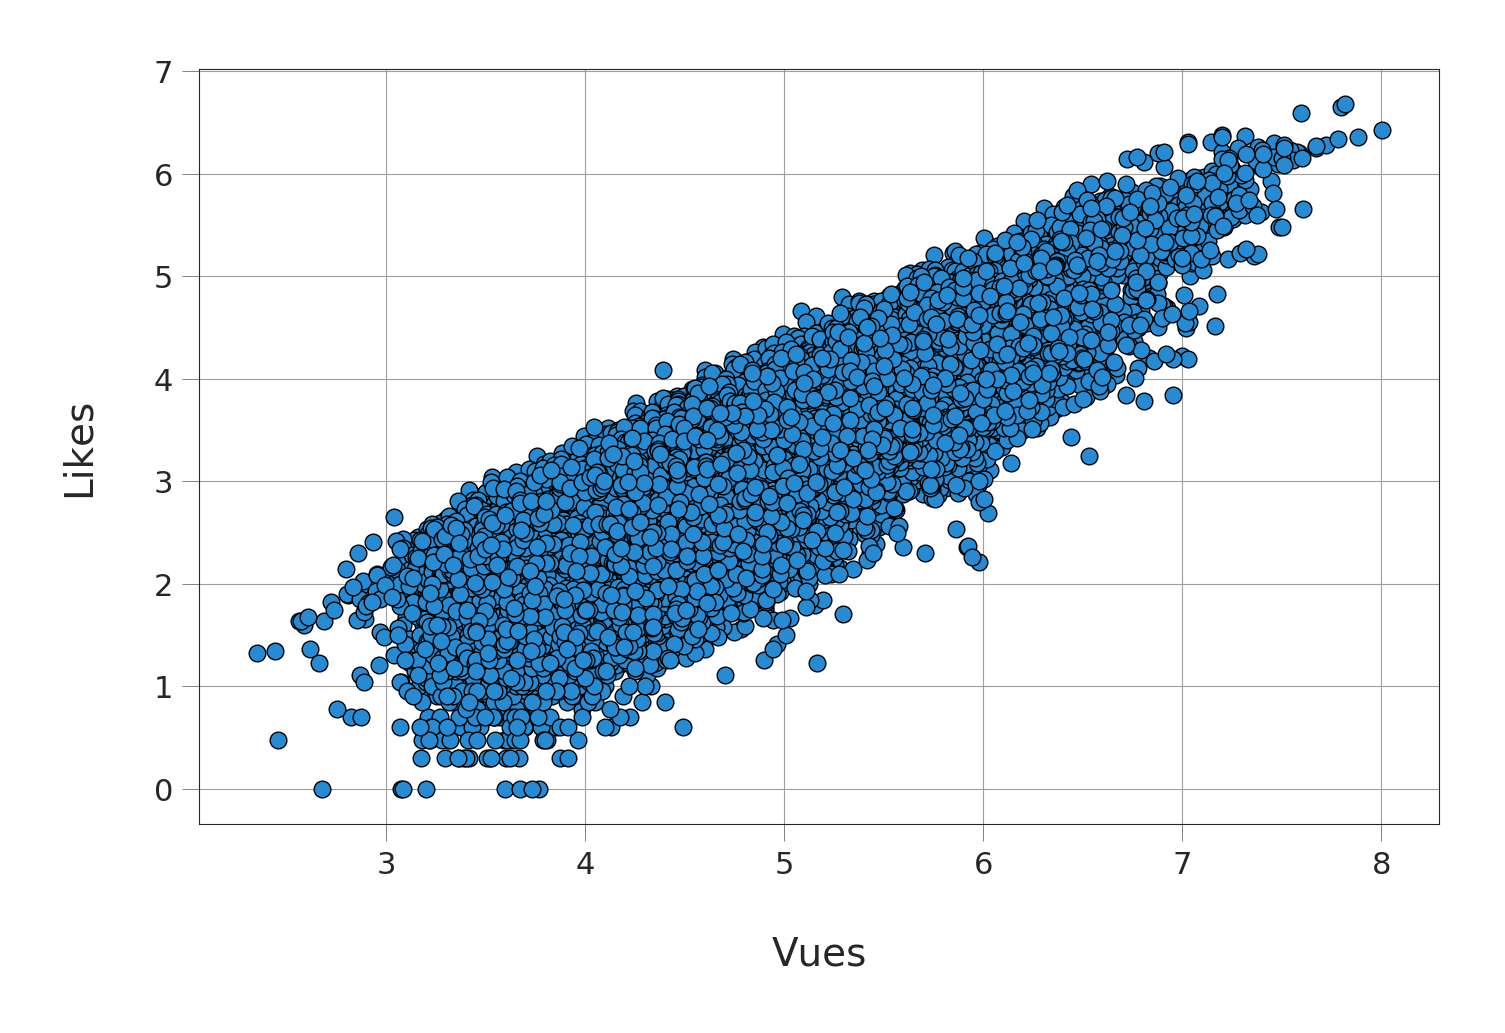

In [185]:
fig, ax = plt.subplots()
_ = plt.scatter(x=data_set['log_views'], y=data_set['log_likes'], color=PLOT_COLORS[0], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Vues", ylabel="Likes")

Nous voyons que les vues et les goûts sont vraiment positivement corrélés: à mesure que l'un augmente, l'autre augmente aussi.

Contrairement au nuage de points que nous avons tracé bien au-dessus (entre les vues et la longueur du titre des video) et ce nuage de point (entre les likes et les vues) on voit bien la distinction entre un nuage de point avec des données très corrélé et des données non corrélé.

Que peut-on déduire à partir de cela ? Dans un premier temps, nous pouvons dire que plus la vidéo est visionnée quantitativement, plus il y aura d'interractions sur la vidéo. C'est la cas pour les likes/dislikes et les commentaires. nous avons utilisé les données bruts de notre jeu de données. Ensuite, pour mettre en avant la corrélation entre nos données, nous avons appliqué le fonction de logarithme décimal. Cela permet à notre graphique d'être plus lisible et d'éliminer les données "orphelines".

## Mots les plus courants dans les titres des vidéos
Voyons s'il y a des mots qui sont utilisés de manière significative dans les titres des vidéos en tendance. Nous afficherons les 25 mots les plus courants en tendance parmis notre jeu de donnée

In [186]:
from nltk.corpus import stopwords
import string

stop_words_fr = stopwords.words('french')
stop_words_en = stopwords.words('english')

title_words = list(data_set["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y if not (x.lower() in stop_words_fr or x.lower() in stop_words_en or x.isdigit())]
Counter(title_words).most_common(25)

[('-', 16674),
 ('!', 4954),
 (':', 4471),
 ('|', 3970),
 ('Episode', 1906),
 ('?', 1827),
 ('&', 1700),
 ('/', 1240),
 ('الحلقة', 1110),
 ('vs', 1070),
 ('و', 733),
 ('في', 703),
 ('Johnny', 692),
 ('Highlights', 683),
 ('HD', 672),
 ('!!', 653),
 ('مسلسل', 635),
 ('(Clip', 602),
 ('Hallyday', 533),
 ('–', 515),
 ('France', 506),
 ('من', 491),
 ('VS', 472),
 ('TV', 464),
 ('(', 451)]

En ignorant les mots de liaison comme "le" et "de", nous pouvons voir que le symbole "-" est souvent présent dans les titres des vidéos à tendance. Nous remarquons également que les mots "Episode", "vs", "Highlights", "HD" et "Clip" sont courants dans les titres vidéo à tendance.

Analysons plus en détails avec un nuage de mots pour les titres de nos vidéos en tendances.
Les mots les plus récurrent seront écrit en plus gros et plus visible.

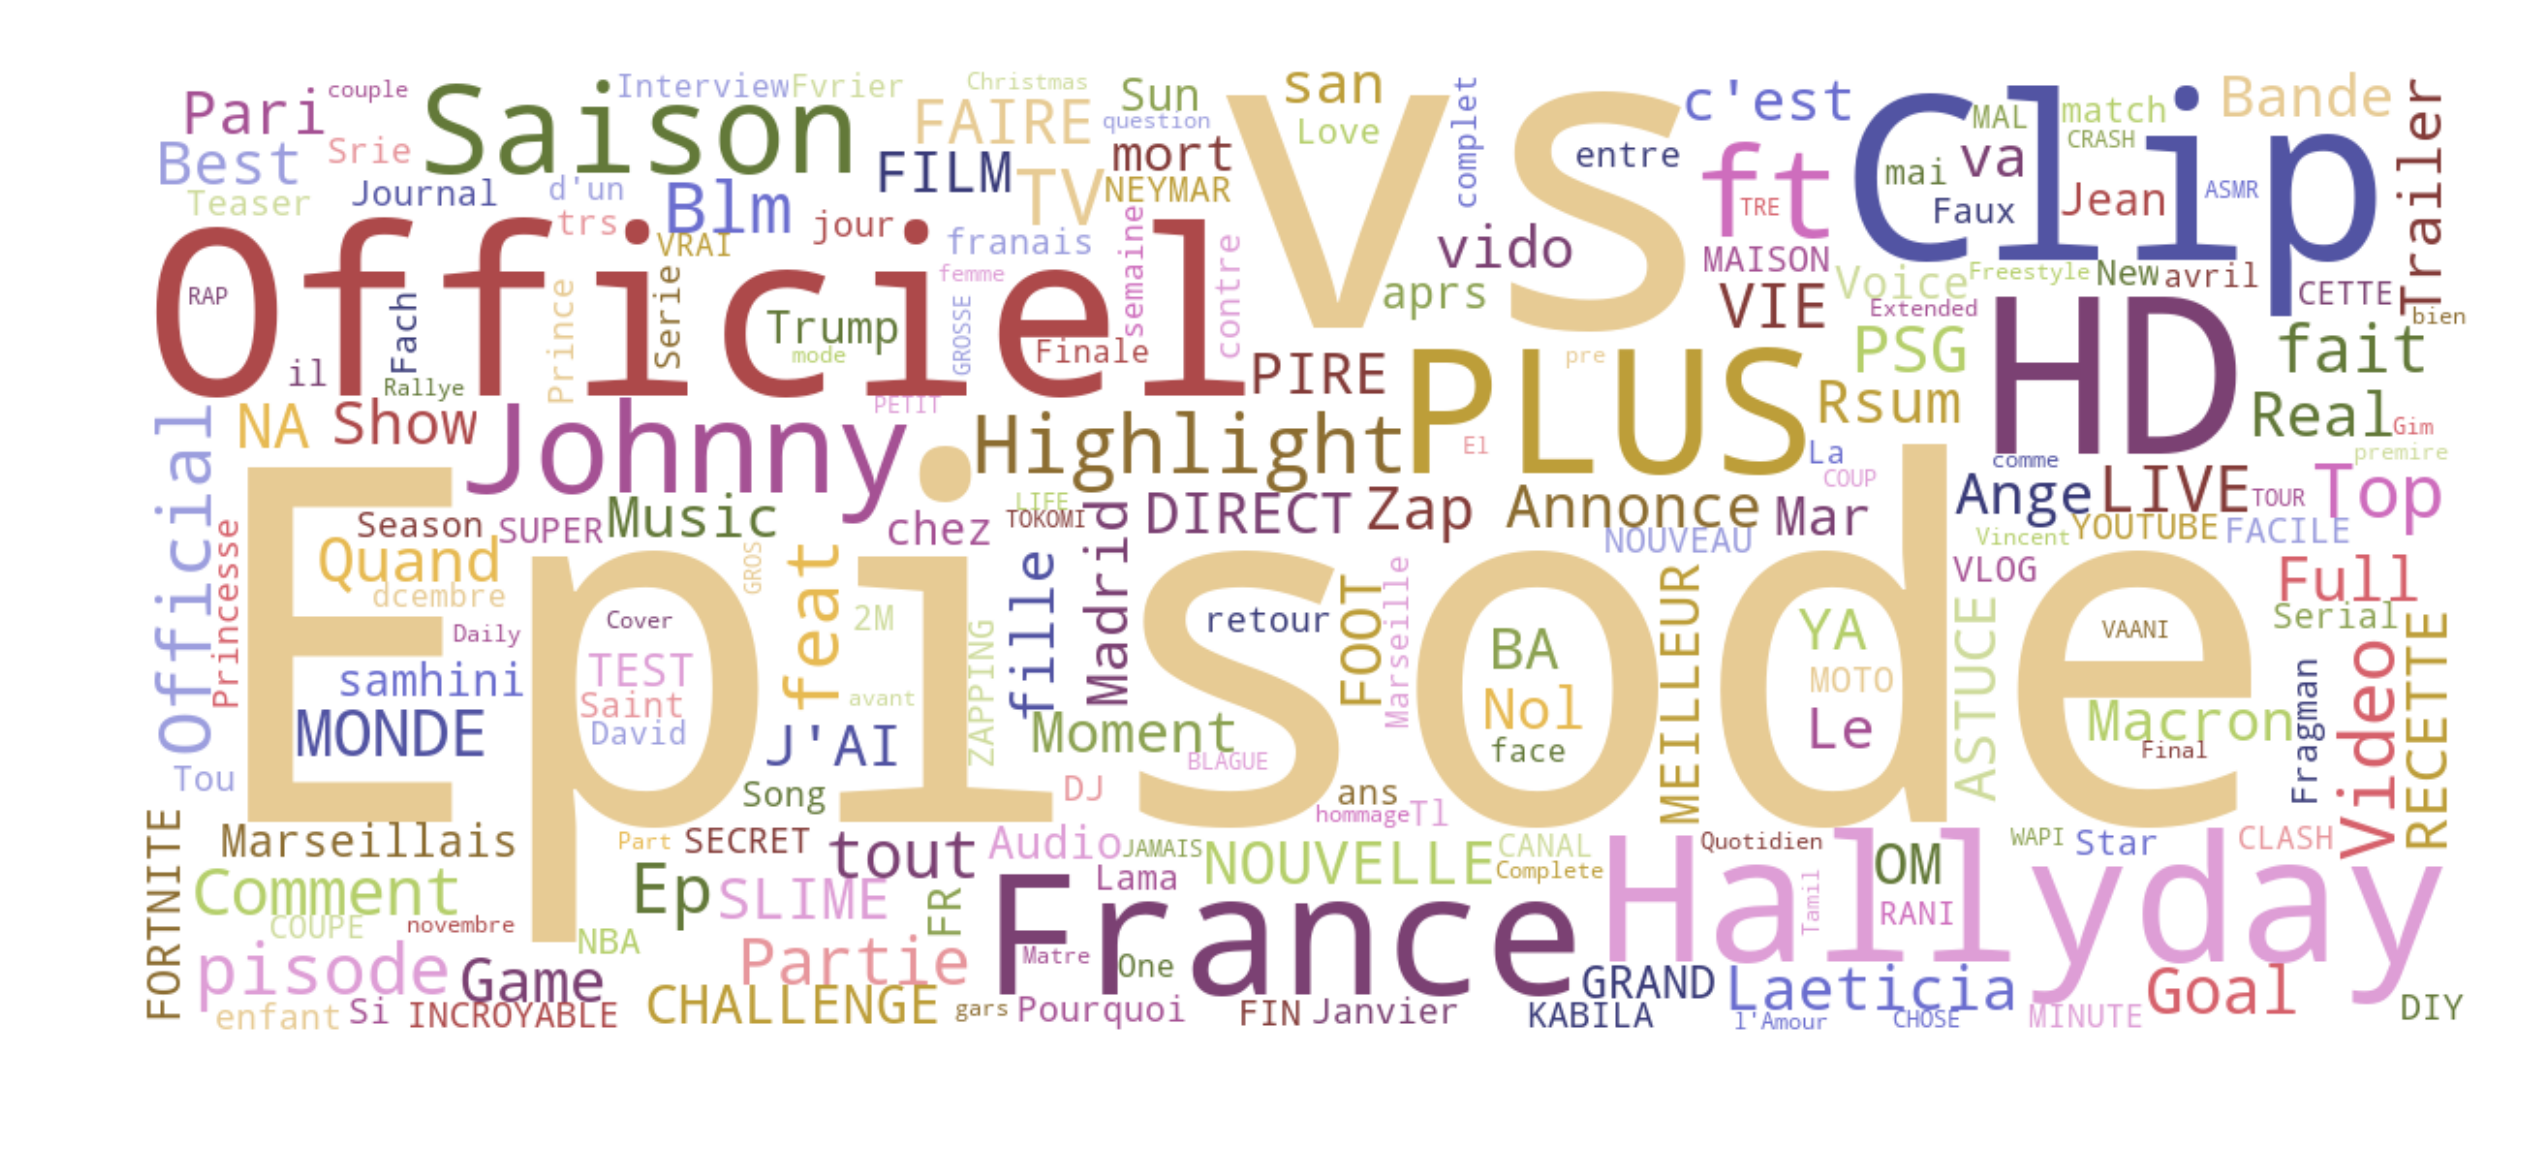

In [187]:
wc_text = ''.join(filter(lambda x: x in string.printable, " ".join(title_words)))

wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(wc_text)


plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

Nous pouvons voir ci dessous un graphique qui nous montre les chaines youtube ayant le plus de vidéo en tendance.

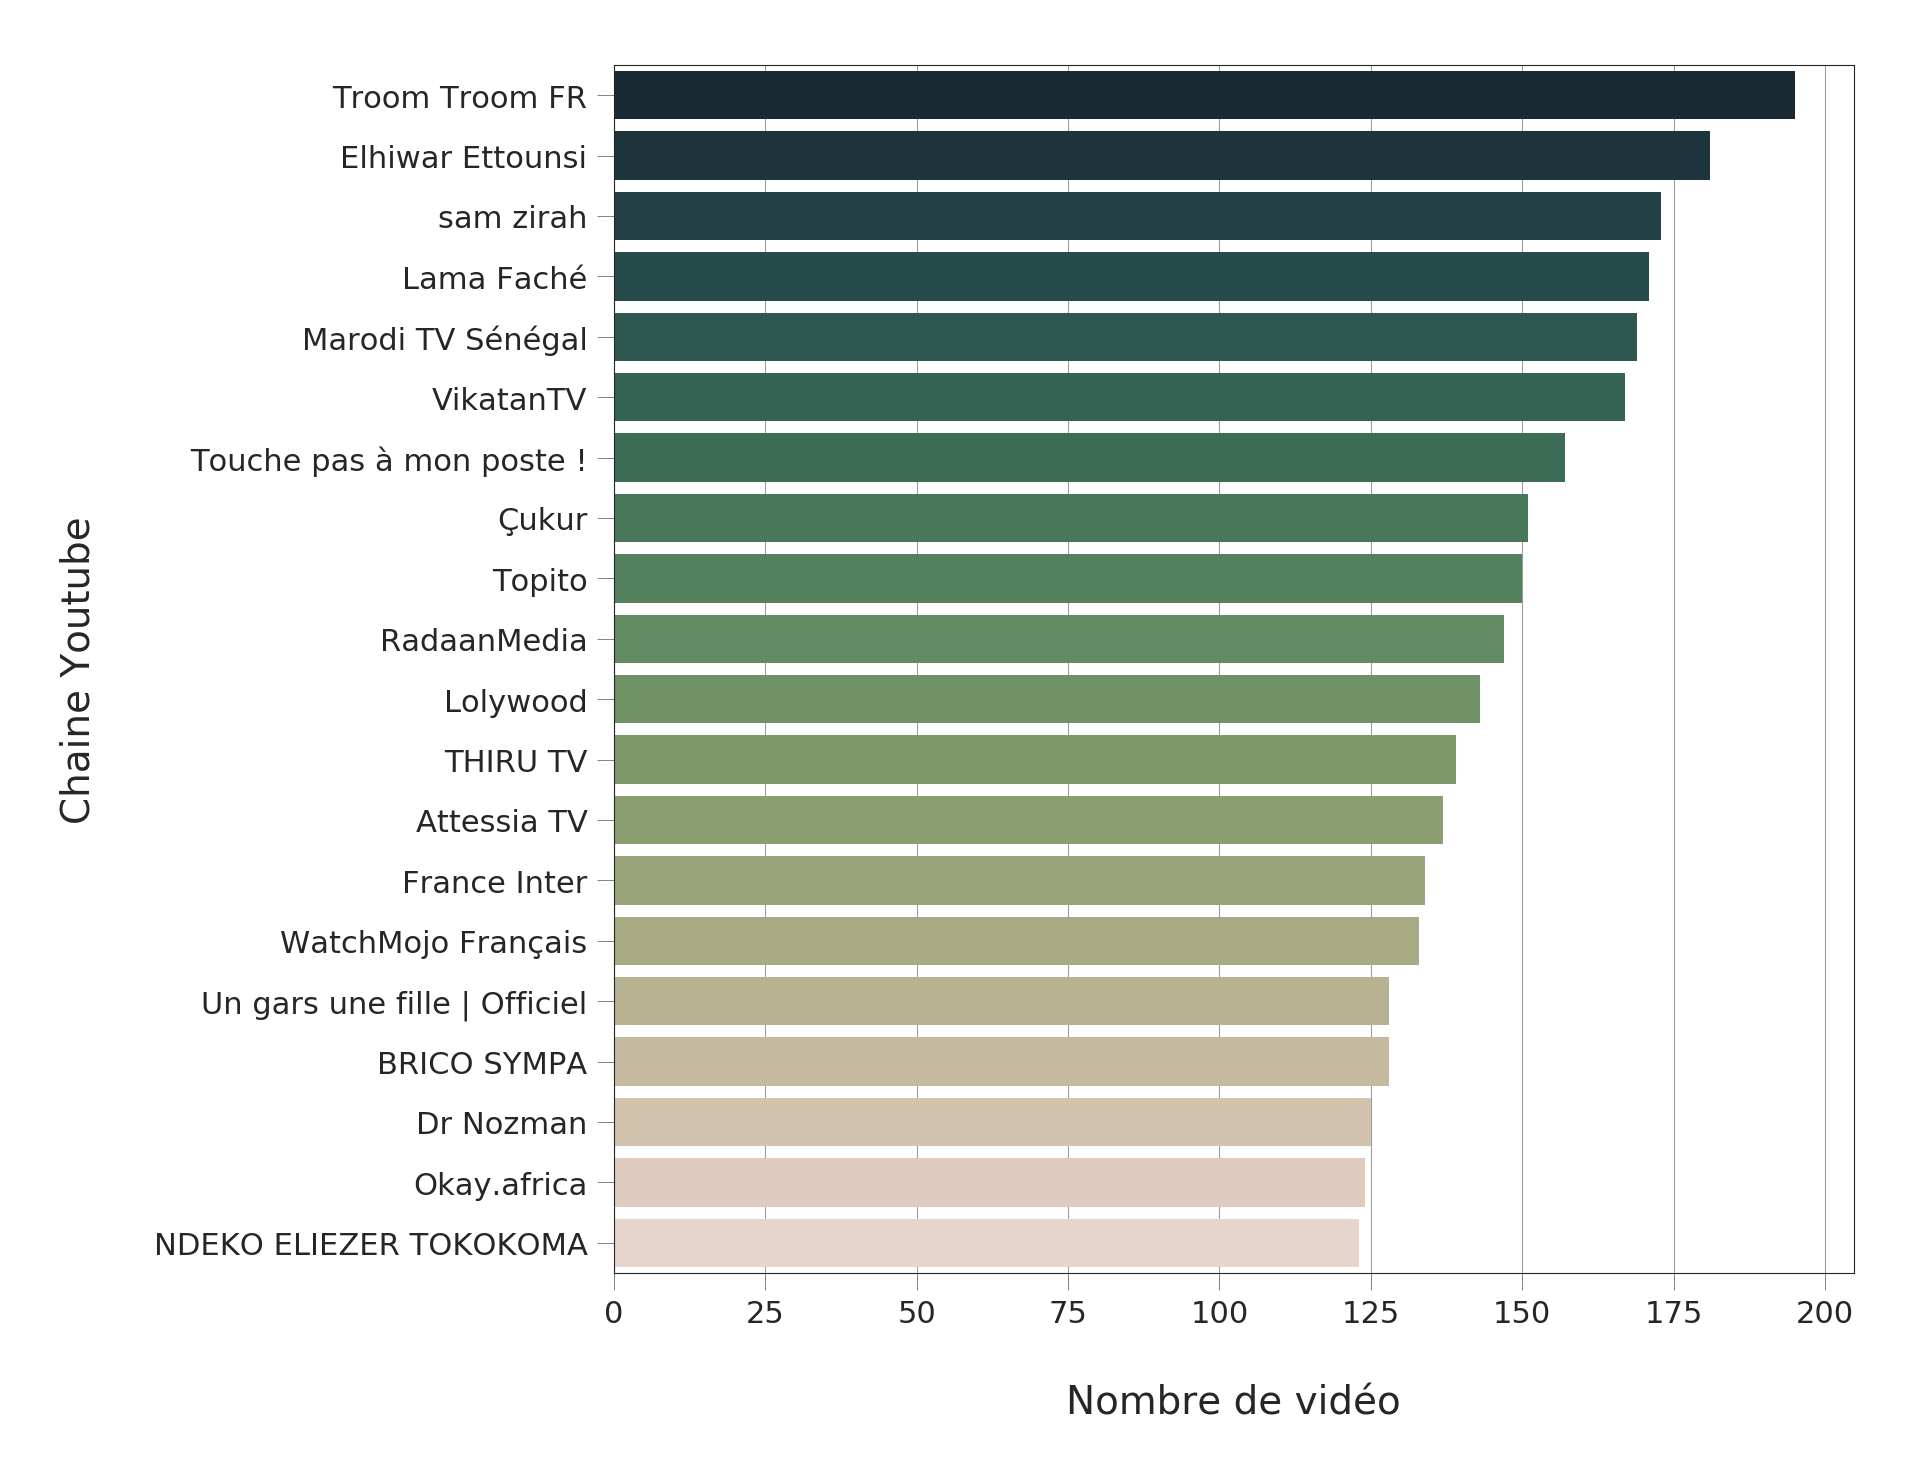

In [188]:
cdf = data_set.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, rot=-.75, reverse=True), ax=ax)
_ = ax.set(xlabel="Nombre de vidéo", ylabel="Chaine Youtube")

La chaîne `Troom Troom FR` a un peu moins de `200` vidéos en tendance ! Ce qui est particulier cas. Nous allons voir la fréquence de vidéo de cette chaîne. 

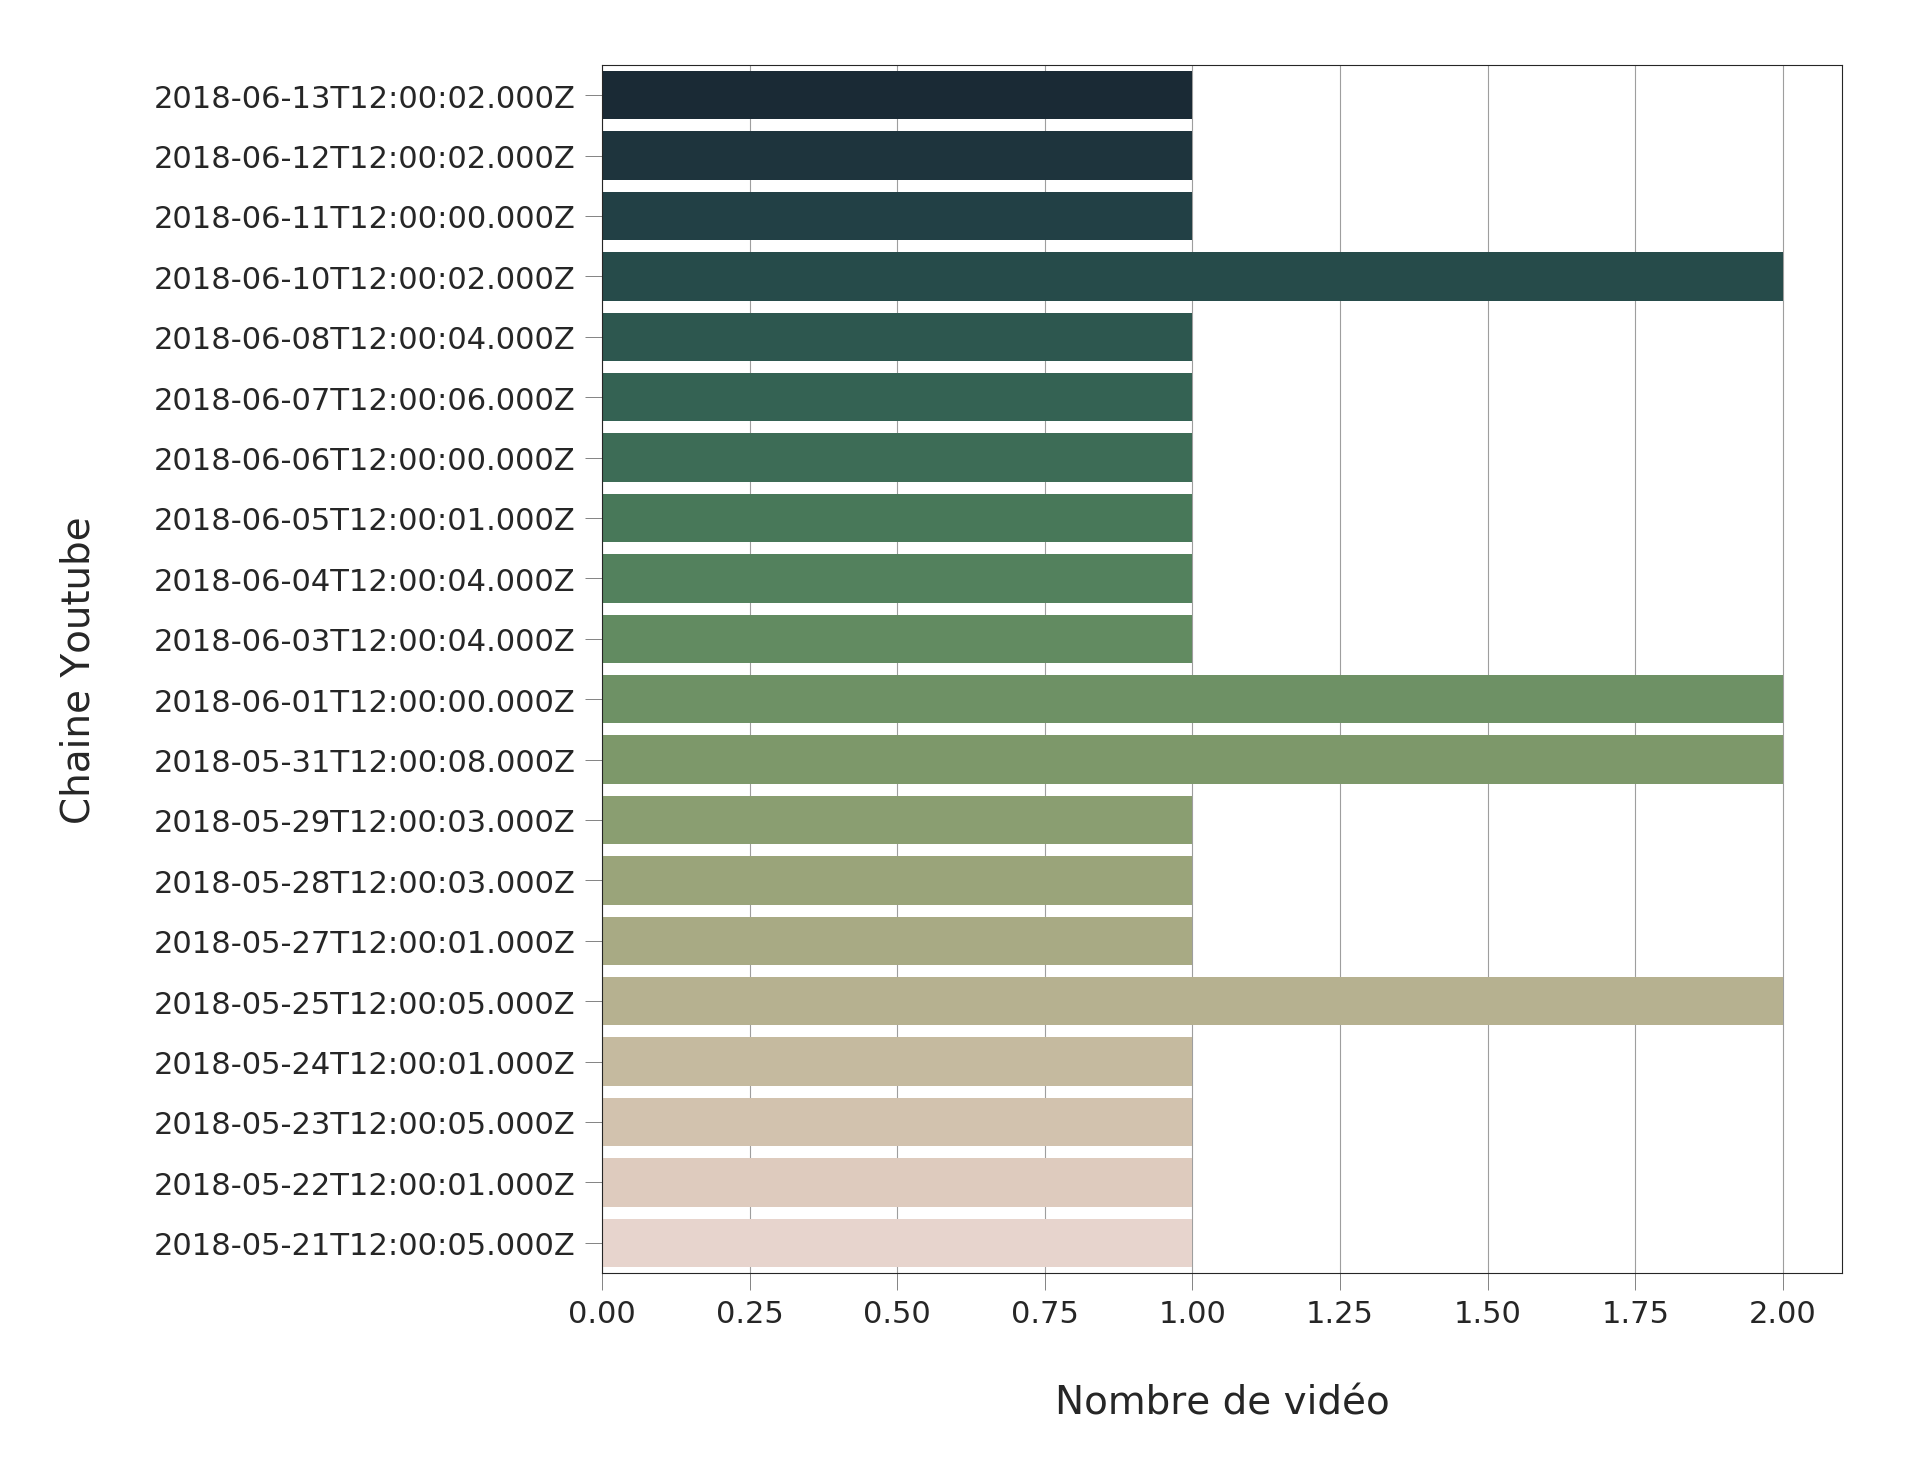

In [189]:
cdf = data_set[data_set["channel_title"] == "Troom Troom FR"].groupby("publish_time").size().reset_index(name="video_count") \
    .sort_values("publish_time", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="publish_time", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, rot=-.75, reverse=True), ax=ax)
_ = ax.set(xlabel="Nombre de vidéo", ylabel="Chaine Youtube")

La chaîne `Troom Troom FR` sort une vidéo par jour et parfois même plus certains jours. L'algorithme de YouTube aime la régularité pour que le spectateur passe plus de temps sur YouTube. Ils mettent donc en avant les chaînes qui sortent du contenu quotidiemment pour attirer le spectateur. Est-ce que cela génère également des interractions ?

In [190]:
data_set[data_set["channel_title"] == "Troom Troom FR"].head()

video_id trending_date  \
25   avNyRo2Vd9U      17.14.11   
339  avNyRo2Vd9U      17.15.11   
458  gwd5EZnEJLE      17.16.11   
622  bbWFas1fJVE      17.17.11   
824  b5Mhywy-7sA      17.18.11   

                                                 title   channel_title  \
25   10 RECETTES DIY DE BAUME À LÈVRES À PARTIR DE ...  Troom Troom FR   
339  10 RECETTES DIY DE BAUME À LÈVRES À PARTIR DE ...  Troom Troom FR   
458                  9 ASTUCES AVEC DE LA COLLE CHAUDE  Troom Troom FR   
622  8 BLAGUES DE SLIME AMUSANTES / LA GUERRE DES B...  Troom Troom FR   
824  15 DIY FOURNITURES SCOLAIRES BIZARRES ! 15  BL...  Troom Troom FR   

     category_id              publish_time  \
25            26  2017-11-13T13:00:01.000Z   
339           26  2017-11-13T13:00:01.000Z   
458           26  2017-11-15T13:00:04.000Z   
622           26  2017-11-16T13:00:05.000Z   
824           26  2017-11-17T13:00:03.000Z   

                                                  tags   views  likes  \
25   DIY"|"baume à lèvres maison"|"EOS"|"gommage"|"...  240158   6765   
339  DIY"|"baume à lèvres maison"|"EOS"|"gommage"|"...  369960   8827   
458  pistolet à colle chaude"|"Astuces"|"Astuces av...  206115   5029   
622  essayer de ne pas rire"|"truc drole"|"vidéo ma...  301902   6644   
824  back to school"|"rentrée"|"rentrée scolaire"|"...  304400   7609   

     dislikes  ...                                  thumbnail_link  \
25        160  ...  https://i.ytimg.com/vi/avNyRo2Vd9U/default.jpg   
339       273  ...  https://i.ytimg.com/vi/avNyRo2Vd9U/default.jpg   
458       202  ...  https://i.ytimg.com/vi/gwd5EZnEJLE/default.jpg   
622       313  ...  https://i.ytimg.com/vi/bbWFas1fJVE/default.jpg   
824       246  ...  https://i.ytimg.com/vi/b5Mhywy-7sA/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed  \
25              False             False                   False   
339             False             False                   False   
458             False             False                   False   
622             False             False                   False   
824             False             False                   False   

                                           description contient_maj  \
25   Abonnez-vous ici : http://bit.ly/2vnYmfc\n12 B...         True   
339  Abonnez-vous ici : http://bit.ly/2vnYmfc\n12 B...         True   
458  Abonnez-vous ici : http://bit.ly/2vnYmfc\n10 R...         True   
622  AVERTISSEMENT : Cette vidéo est juste pour s’a...         True   
824  Abonnez-vous ici : http://bit.ly/2vnYmfc\n8 BL...         True   

     title_length  log_views  log_likes  log_comment  
25             53       5.38       3.83         2.97  
339            53       5.57       3.95         3.07  
458            33       5.31       3.70         2.84  
622            52       5.48       3.82         2.86  
824            70       5.48       3.88         2.66  

[5 rows x 21 columns]

Au niveau interraction, ils sont dans la moyenne basse. C'est à dire que cela confirme bien que YouTube peut** mettre en avant un contenu régulier** tant que cela génère un minimum de vues, de likes et de commentaires.

## Quelle catégorie de vidéos contient le plus grand nombre de vidéos tendances ?
Tout d'abord, nous ajouterons une colonne qui contient des noms de catégorie basés sur les valeurs de la colonne `category_id`. Nous utiliserons un fichier JSON de catégorie fourni avec l'ensemble de données qui contient les informations sur chaque catégorie.

In [191]:
with open("../input/youtube-new/FR_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    print(cat["snippet"]["title"])
data_set['category_name'] = data_set['category_id'].map(cat_dict)

Film & Animation
Autos & Vehicles
Music
Pets & Animals
Sports
Short Movies
Travel & Events
Gaming
Videoblogging
People & Blogs
Comedy
Entertainment
News & Politics
Howto & Style
Education
Science & Technology
Movies
Anime/Animation
Action/Adventure
Classics
Comedy
Documentary
Drama
Family
Foreign
Horror
Sci-Fi/Fantasy
Thriller
Shorts
Shows
Trailers


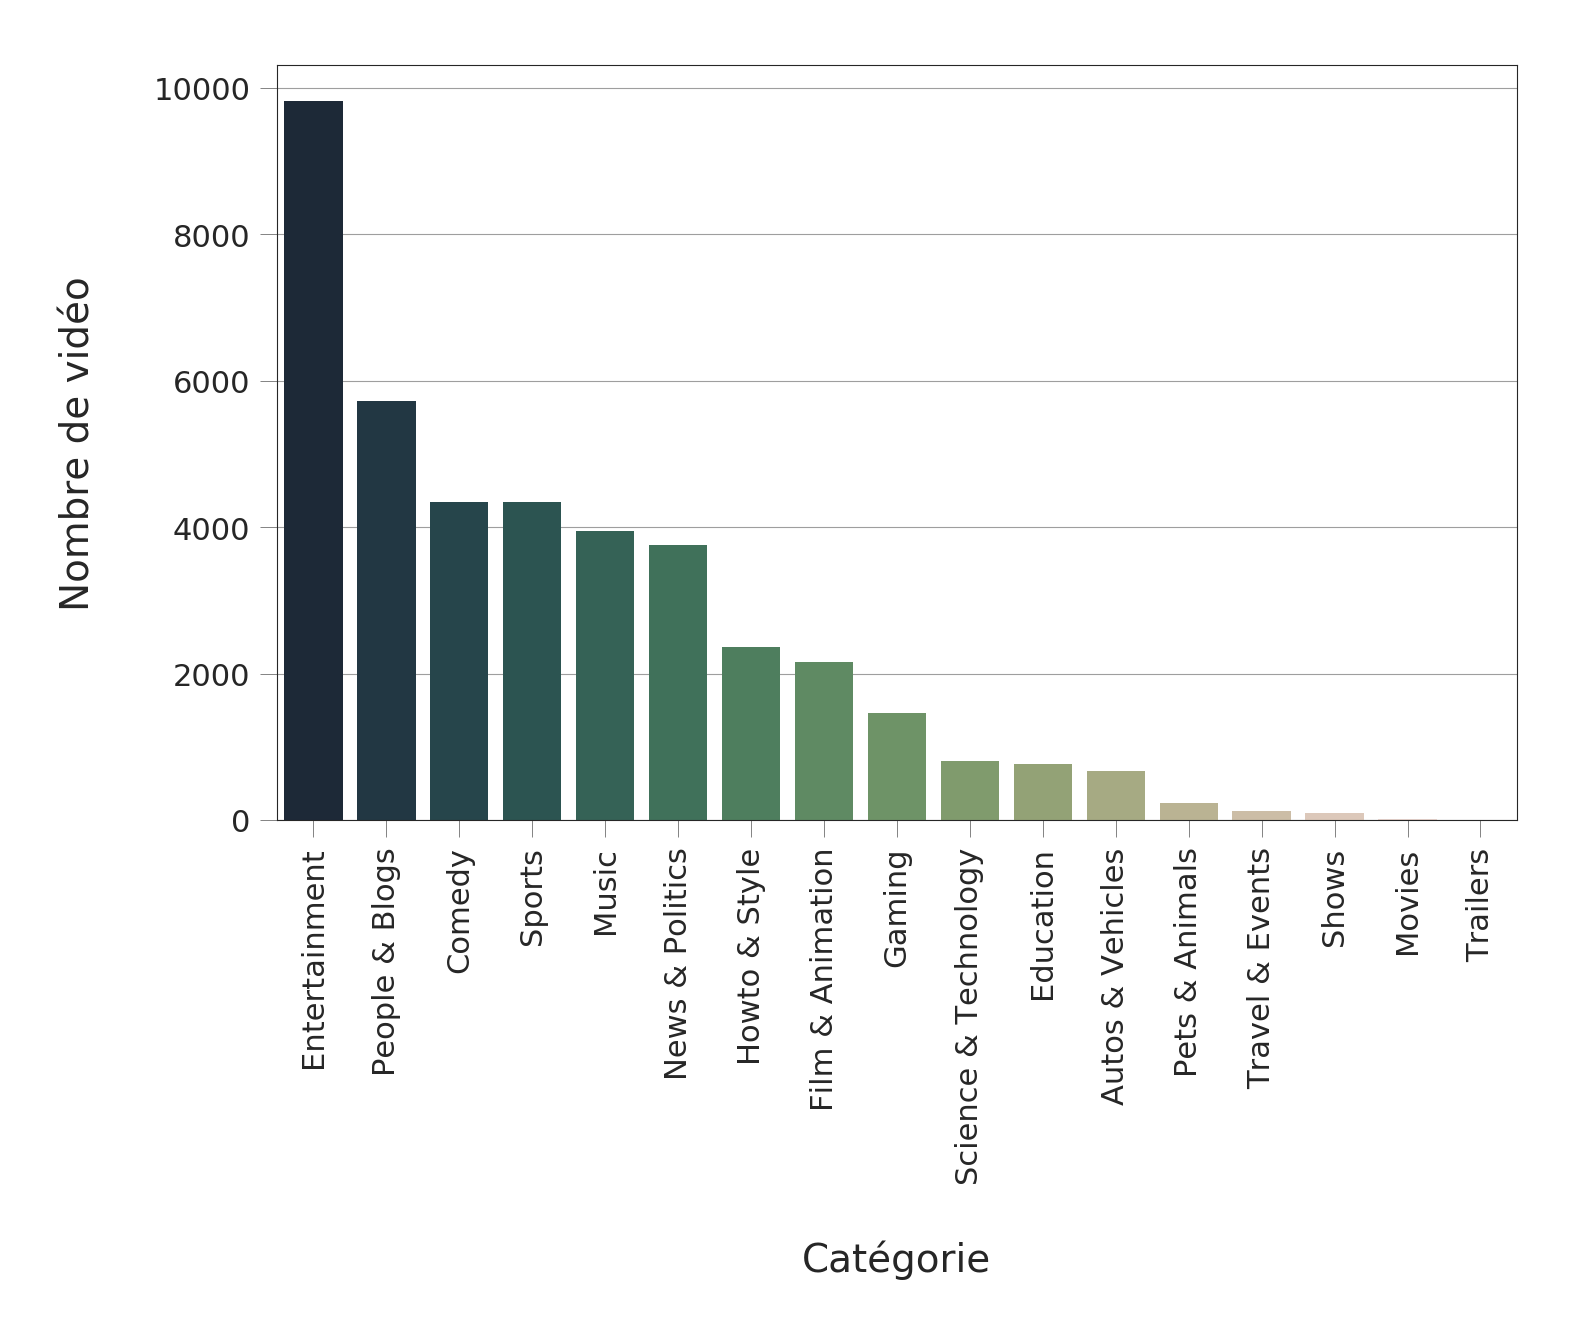

In [192]:
cdf = data_set["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, start=.1, rot=-.8, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Catégorie", ylabel="Nombre de vidéo")

Nous voyons que la catégorie **Divertissement** contient le plus grand nombre de vidéos tendances parmi les autres catégories: environ `10 000` vidéos, suivi de la catégorie **People & Blogs** avec environ 5 900 vidéos, suivi de la catégorie **Comedy** avec environ `4 100` vidéos, etc. Les spectateurs sont intéressés par les vidéos de type divertissement avec des "top 10", des "vidéos réactions" etc. Suivi par des vidéos vlog où le créateur voyage et filme sa vie. Enfin, la comédie arrive en 3ème position avec des podcasts, sketchs... Les vidéos autos et motos n'interessent pas le spectateur.

## Quel jour et à quelle heure les vidéos sont-ils plubliées ?
Nous avons la colonne `publish_time` qui indique la date et l'heure de publication de la vidéo. L'heure est réglé au fuseau horaire UTC `Coordinated Universal Time`. nous allons pour notre analyse séparer les deux données pour avoir d'un côté la date, et de l'autre l'heure.

In [193]:
data_set["jour"] = data_set["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
data_set["heure"] = data_set["publish_time"].apply(lambda x: x[11:13])

Très bien, maintenant nous allons voir quel est le jour le plus optimimal pour mettre en ligne une vidéo et avoir une chance qu'elle se retrouve en tendance.

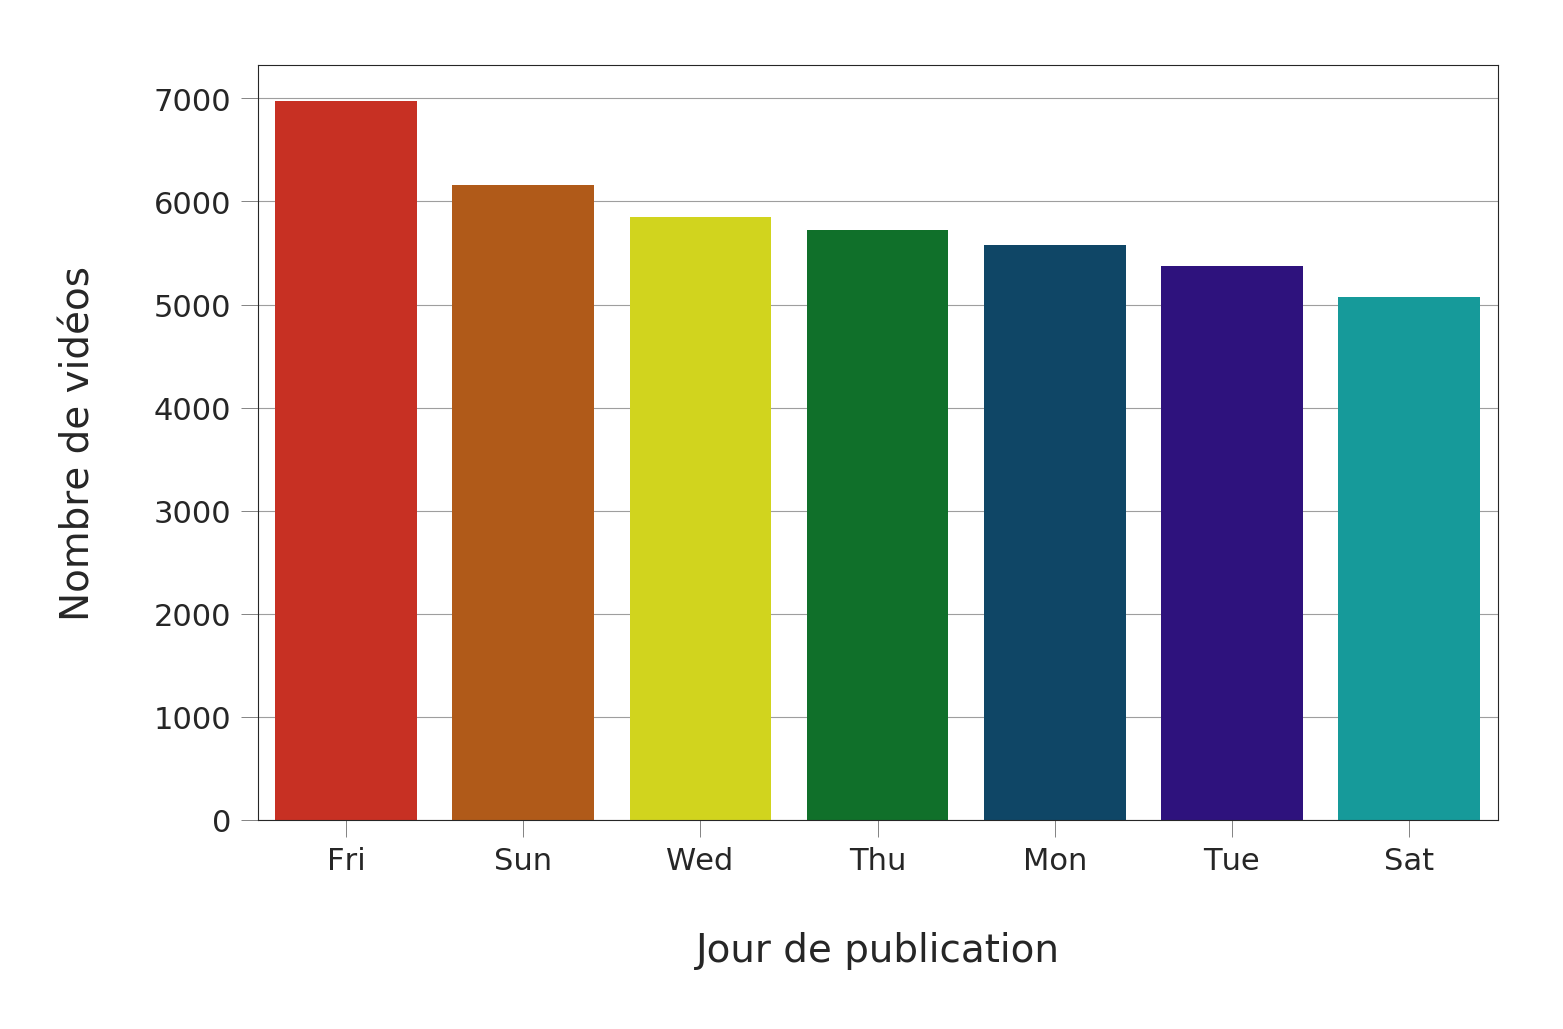

In [194]:
cdf = data_set["jour"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "jour", "jour": "nombre_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="jour", y="nombre_videos", data=cdf, 
                palette=sns.color_palette(['#e31907', '#c95700', '#eef200', 
                                           '#008022', '#004a75', '#26008f', '#00b0b0'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Jour de publication", ylabel="Nombre de vidéos")

Le jour le plus optimal pour publier une vidéo sur YouTube est le **vendredi**. Cela est logique dans le sens où c'est le début du week-end et, le temps que YouTube mette la vidéo en tendance, ça tombera pile pendant le week-end. Il y a un délai entre le moment où la vidéo est publiée et le moment où la vidéo est placée en tendance par YouTube qui est entre 24h et 48h d'après notre expérience personnelle. Si on met en ligne une vidéo vendredi, on aura plus de chance qu'elle se retrouve en tendance le week-end et donc elle va générer plus de vues et d'interactions. Glogalement, les résultats sont équilibrés les autres jours. Il n'y a pas de jour où il est difficile d'aller en tendance.

Maintenant nous allons voir à quelle heure faut-il publier un vdéo grâce à la colonne `publishing_hour` que nous avons créé.

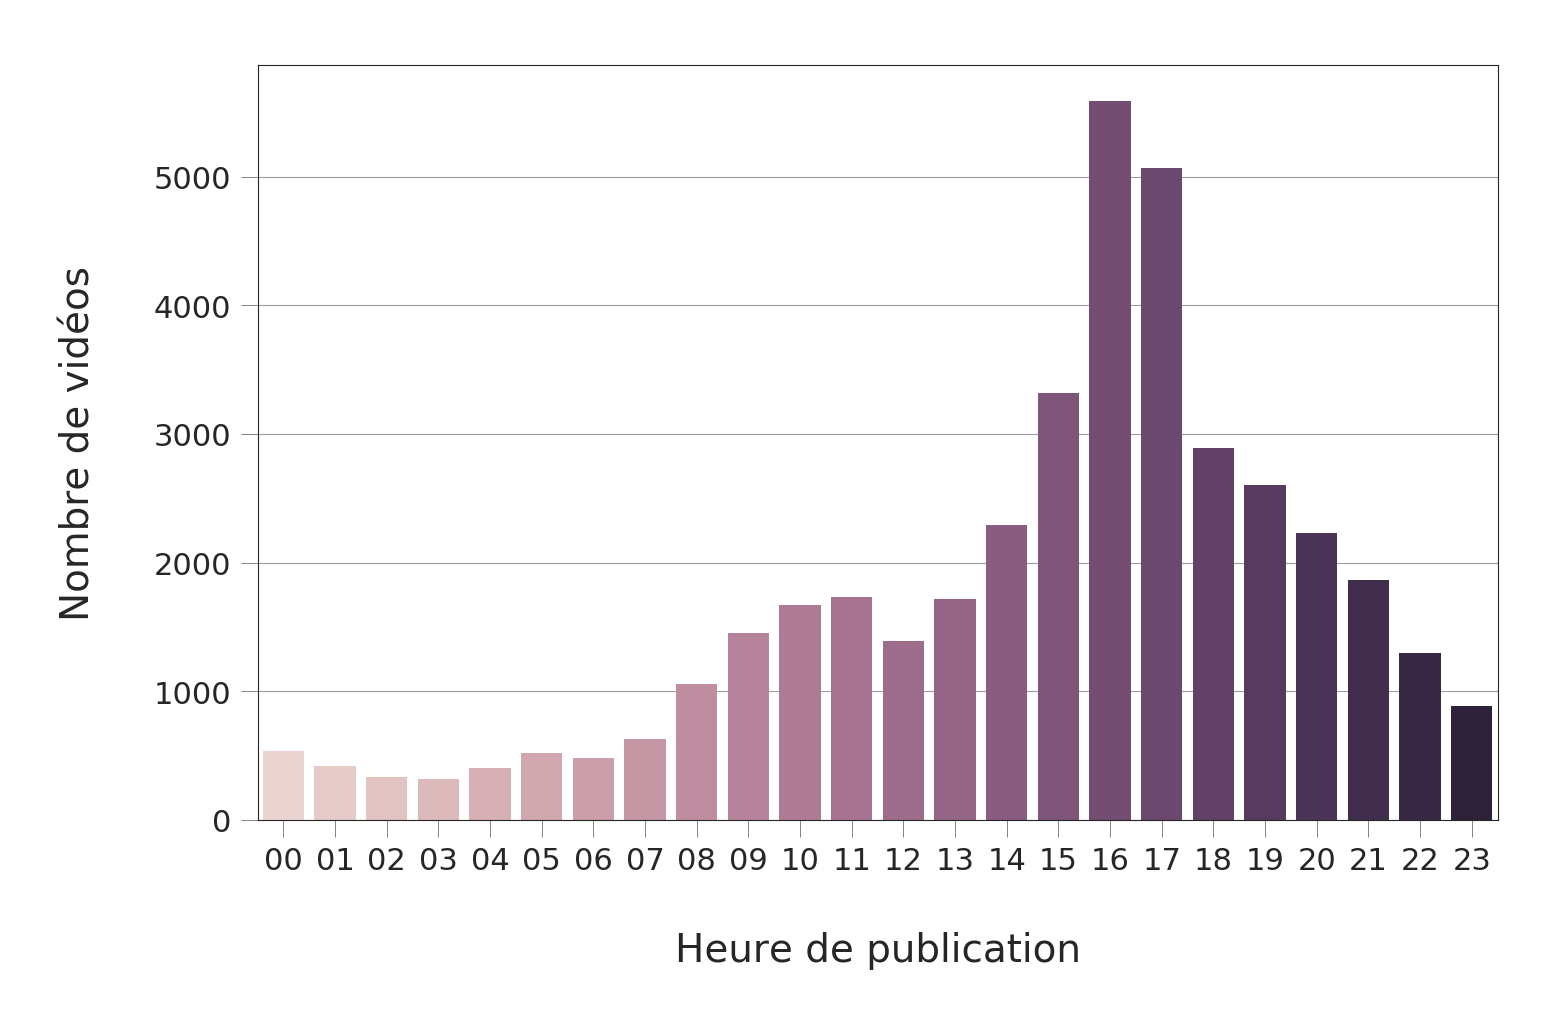

In [195]:
cdf = data_set["heure"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "heure", "heure": "nombre_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="heure", y="nombre_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Heure de publication", ylabel="Nombre de vidéos")

Voici notre conclusion sur ces données : 
* Une vidéo publiée entre minuit et 7:00 a peu de chance d'être en tendance YouTube à cause du manque de spectateurs pendant ces heures là. Elle perdra du temps pour attirer du monde, aura une mauvaise visibilité et donc ne sera pas mise en avant par l'algorithme YouTube.
* L'heure optimale pour poster une vidéo est donc 16h. Si on regroupe cette donnée avec le jour optimal, on obtient donc une date de mise en ligne le **Vendredi à 16h**. C'est là où les spectacteurs reviennent du travail ou de l'école et veulent se détendre après une semaine de travail. Il y a donc un nombre important de spectateurs en fin de semaine avant le week-end.
* On peut en dire autant pour **Vendredi à 17h** même s'il y a moins de vidéos à cette heure.
* Nous avons une courbe de Gauss avec ce graphique avec les heures les moins représentés pendant la nuit et les heures les plus actives en fin d'après-midi. 

## Les vidéos supprimées

Dans certains cas, une vidéo en tendance qui a été supprimée a fait l'objet d'une polémique avec des propos ou des images choquantes. Dans un premier temps, nous allons avoir le pourcentage de vidéos qui ont été supprimées avec la colonne `video_error_or_removed`.

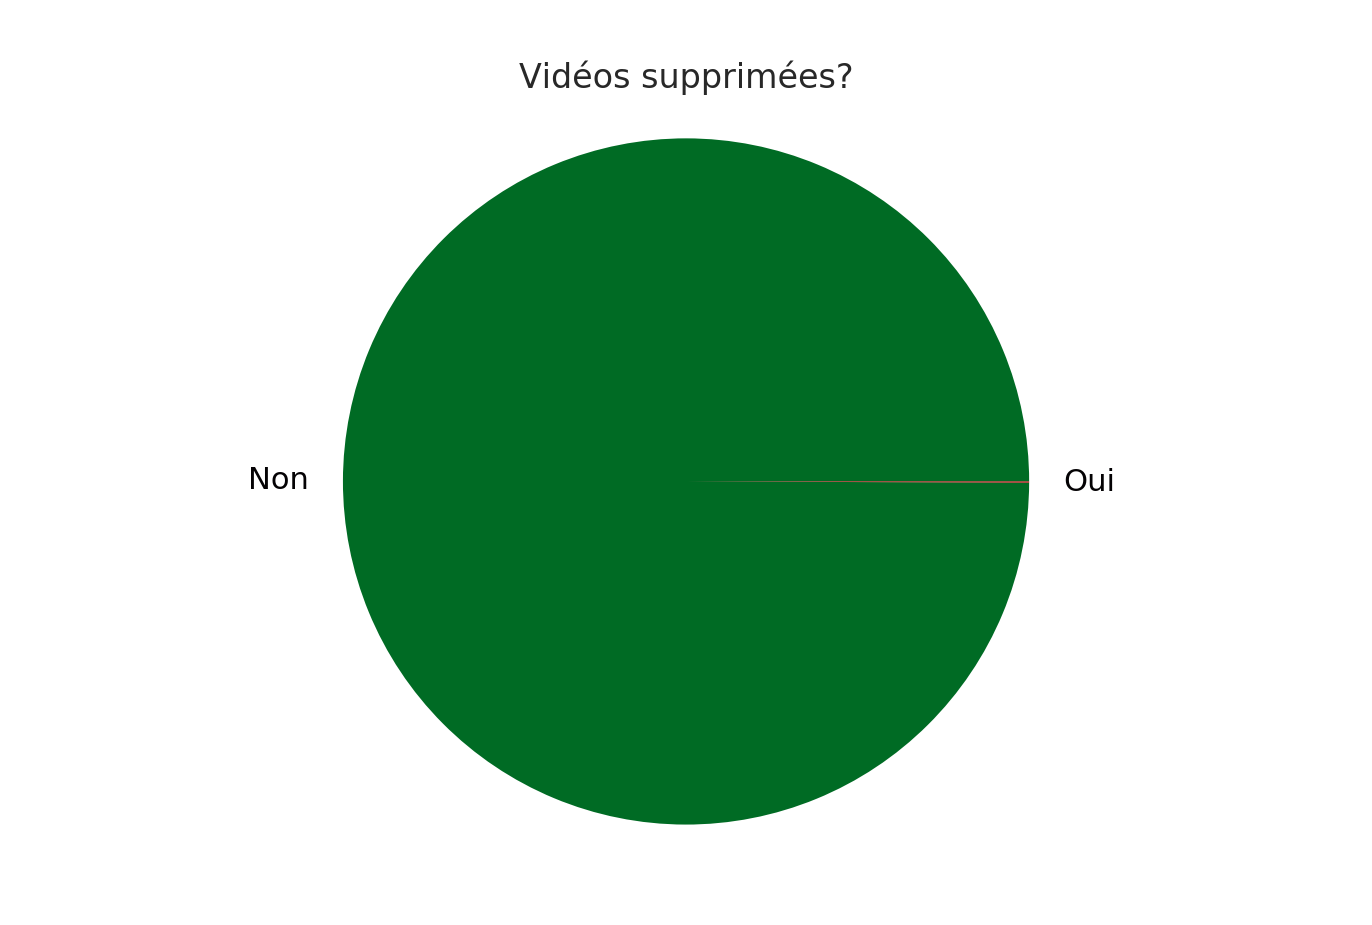

In [196]:
value_counts = data_set["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['Non', 'Oui'], 
        colors=['#006b24', '#b00000'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Vidéos supprimées?')

In [197]:
data_set["video_error_or_removed"].value_counts()

False    40702
True        22
Name: video_error_or_removed, dtype: int64

Il n'y a que très peu de vidéos supprimées. Nous allons prendre un échantillion pour voir de quoi il s'agit.

In [198]:
data_set[data_set["video_error_or_removed"] == True].head(15)

video_id trending_date          title  \
4694   RrxfGjGY_mg      17.07.12  Deleted video   
5818   qSNjr7aLu3Y      17.13.12  Deleted video   
9744   qSQ7zRWX7jY      18.01.01  Deleted video   
9812   yfZ3BfZ97yA      18.02.01  Deleted video   
10332  sDWyVZfd9R8      18.04.01  Deleted video   
12021  7qmSwj8Pwys      18.15.01  Deleted video   
12482  DfX55eZOSgM      18.17.01  Deleted video   
12931  vOfKpwlJspY      18.19.01  Deleted video   
14459  eHlGlTuBFNQ      18.27.01  Deleted video   
15292  w_7q4-aMjCE      18.31.01  Deleted video   
15506  vHKQEfo-YDE      18.01.02  Deleted video   
15882  VTcnsqPcYQg      18.03.02  Deleted video   
16316  gIX5zeZzp4o      18.05.02  Deleted video   
16458  y6K1oTCQqzE      18.06.02  Deleted video   
16598  bUStcgFlAIY      18.07.02  Deleted video   

                           channel_title  category_id  \
4694                  WatchMojo Français           24   
5818                      RomeoElvisVEVO           10   
9744                   Анатолий Муравьёв            1   
9812                      Music Relaxing           10   
10332                          broudge03           25   
12021                        Dehay hafas           24   
12482                           THIRU TV           24   
12931                         Le Sportif           20   
14459                          RT France           25   
15292                          Divers Tv           22   
15506                           Ça Zap !           24   
15882                  AKRAMJUNIOR DAILY            2   
16316       zoobeauval (page officielle)           15   
16458                             Verino           23   
16598  LMDLT Le Meilleur de la télévison           24   

                   publish_time  \
4694   2017-12-06T14:30:00.000Z   
5818   2017-12-11T09:00:01.000Z   
9744   2017-11-15T11:26:53.000Z   
9812   2018-01-01T06:00:06.000Z   
10332  2018-01-03T12:40:36.000Z   
12021  2018-01-14T20:34:15.000Z   
12482  2018-01-16T14:30:01.000Z   
12931  2018-01-17T22:16:29.000Z   
14459  2018-01-26T11:44:45.000Z   
15292  2018-01-29T20:22:15.000Z   
15506  2018-01-31T10:30:01.000Z   
15882  2018-02-02T22:05:18.000Z   
16316  2018-02-04T08:30:00.000Z   
16458  2018-02-03T09:59:12.000Z   
16598  2018-02-06T11:31:29.000Z   

                                                    tags    views  likes  \
4694   glauques"|"endroits"|"pays"|"voyage"|"visites"...    49436   2318   
5818   Roméo"|"Elvis"|"Le"|"Motel"|"Nappeux"|"Barclay...   345164  20223   
9744                                              [none]   934561   5814   
9812   Piano Music"|"Music Cover"|"piano cover"|"musi...   406894   1524   
10332  dégats tempéte éléanor"|"tempéte éléanor"|"mét...     7297     15   
12021                                             [none]  1121261   6736   
12482  kuladheivam"|"kuladheivam 16.01.2018."|"kuladh...   137243    457   
12931                                             [none]    78960    215   
14459  RT"|"Russia Today"|"RT France"|"actu"|"info"|"...    11378     34   
15292                                             مغربية   249597   6474   
15506  ca zap"|"web"|"zapping web"|"lezapping"|"zappi...    40932    398   
15882                  porsche"|"997"|"gt2"|"akramjunior    26892   1483   
16316        panda"|"yuan meng"|"zoo"|"beauval"|"zooparc     6771    232   
16458  verino"|"stand"|"up"|"comique"|"podcast"|"live...   282245  21163   
16598  mennel the voice"|"isabelle morini bosc racist...    29800      0   

       dislikes  ...  video_error_or_removed  \
4694         79  ...                    True   
5818        605  ...                    True   
9744         24  ...                    True   
9812        248  ...                    True   
10332         2  ...                    True   
12021       335  ...                    True   
12482       159  ...                    True   
12931        68  ...                    True   
14459        69  ...                    True   
15292       312  ...  

Dans cet échantillion, nous retrouvons par exemple une vidéo sur l'affaire `Mennel the voice` qui a fait polémique en 2018. Dans les tags de la vidéo, on retrouve le mot clé `racist`. C'est un exemple de vidéo supprimée qui a fait l'objet d'une polémique et les utilisateurs ont signalé la vidéo pour la faire disparaître de YouTube.

Deuxième exemple, la vidéo de `WatchMojo Français` où la description commence par `Top 10 des endroits les plus glauques du monde`. Cela a dû être censuré à cause d'images choquantes et non-appropriées à la plateforme YouTube dans le but de protéger le spectacteur.

## Les vidéos avec commentaires et avis désactivés

Les vidéos qui ont les commentaires et les avis désactivés ont plusieurs raisons de faire cela :
* La vidéo a fait polémique et on veut éviter les insultes, débats et les menaces dans les commentaires
* Le créateur a fait l'objet d'une polémique et ne veut pas avoir uniquement des avis négatifs
* La vidéo vient d'une chaîne de télévision et ils désactivent par défaut les commentaires.

Nous allons voir combien de vidéos ont les commentaires désactivés avec la colonne `comments_disabled `

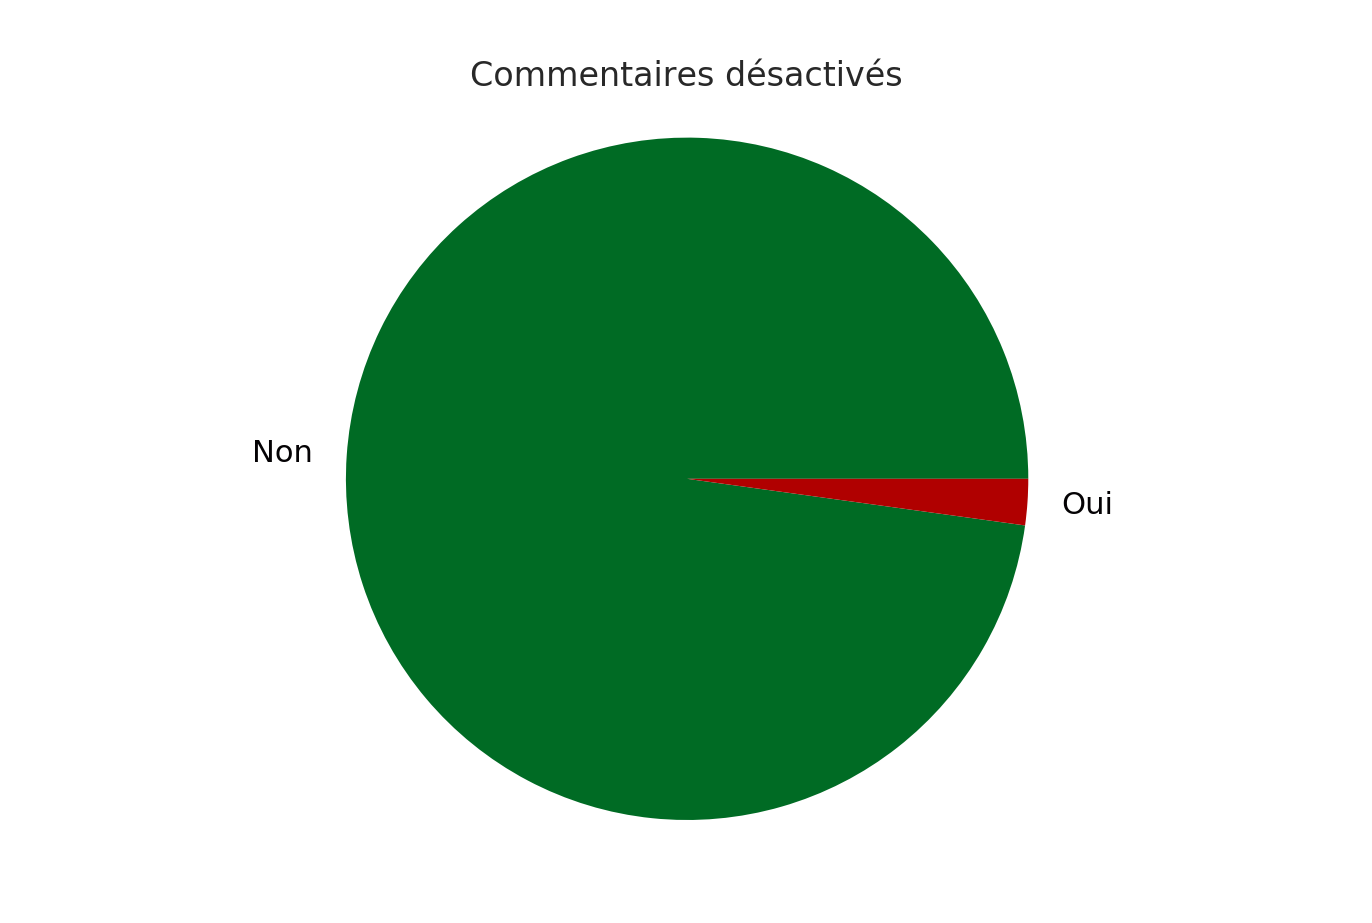

In [199]:
value_counts = data_set["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()

_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['Non', 'Oui'], 
           colors=['#006b24', '#b00000'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Commentaires désactivés')

In [200]:
data_set["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

Il n'y a que `2%` de vidéos où les commentaires sont désactivés.

Pour les avis, nous allons utiliser la colonne `ratings_disabled `.

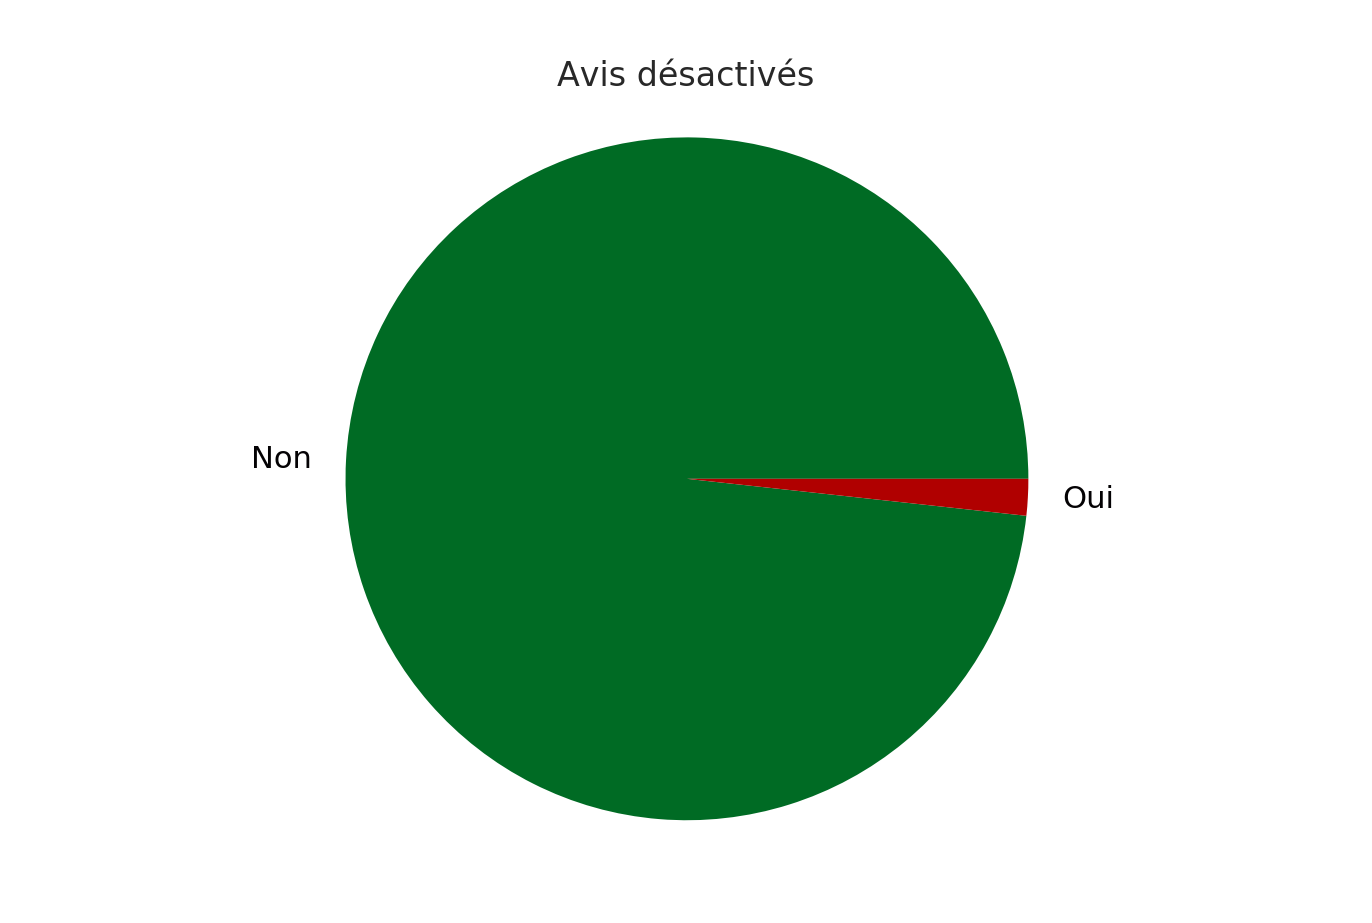

In [201]:
value_counts = data_set["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()

_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['Non', 'Oui'], 
           colors=['#006b24', '#b00000'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Avis désactivés')

In [202]:
data_set["ratings_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: ratings_disabled, dtype: float64

Même résultat pour les avis. `2%` des vidéos ont les avis désactivés.

Maintenant nous allons voir quand les deux sont désactivés sur la même vidéo.

In [203]:
len(data_set[(data_set["comments_disabled"] == True) & (data_set["ratings_disabled"] == True)].index)

383

Sur `41 000` vidéos, il y a environ `400` vidéos avec les deux paramètres désactivés. Ce qui représente toujours `2%` environ. Nous allons prendre un échantillion :

In [204]:
data_set[(data_set["comments_disabled"] == True) & (data_set["ratings_disabled"] == True)].head()

video_id trending_date  \
10   LhjhGOBIoHM      17.14.11   
275  LhjhGOBIoHM      17.15.11   
295  dK4BI6l-ScE      17.15.11   
407  RGg6oUphTkg      17.16.11   
421  SPzWTA99puE      17.16.11   

                                                 title        channel_title  \
10   Jérémy Ferrari - On n'est pas couché 11 novemb...  On n'est pas couché   
275  Jérémy Ferrari - On n'est pas couché 11 novemb...  On n'est pas couché   
295  Marché de Noël : Audience au Tribunal Administ...               CLNEWS   
407                                   Meteore 20171114       Maxime Stephan   
421        Amazing fireball over Germany on 14.11.2017                  ERZ   

     category_id              publish_time  \
10            24  2017-11-12T00:53:02.000Z   
275           24  2017-11-12T00:53:02.000Z   
295           25  2017-11-14T15:36:19.000Z   
407           22  2017-11-15T14:13:13.000Z   
421           28  2017-11-14T23:29:19.000Z   

                                                  tags   views  likes  \
10   onpc"|"on n'est pas couche"|"laurent ruquier"|...  294065      0   
275  onpc"|"on n'est pas couche"|"laurent ruquier"|...  331092      0   
295        CLNEWS clement Lanot"|"news"|"actu"|"france    2707      0   
407                                             [none]  102907      0   
421                                             [none]   15719      0   

     dislikes  ...  video_error_or_removed  \
10          0  ...                   False   
275         0  ...                   False   
295         0  ...                   False   
407         0  ...                   False   
421         0  ...                   False   

                                           description  contient_maj  \
10   Jérémy Ferrari - On n'est pas couché 11 novemb...          True   
275  Jérémy Ferrari - On n'est pas couché 11 novemb...          True   
295  TOUT USAGE COMMERCIAL OU NON COMMERCIAL STRICT...         False   
407                                                            False   
421        Amazing fireball over Germany on 14.11.2017         False   

     title_length  log_views log_likes  log_comment         category_name  \
10             59       5.47      -inf         -inf         Entertainment   
275            59       5.52      -inf         -inf         Entertainment   
295            91       3.43      -inf         -inf       News & Politics   
407            16       5.01      -inf         -inf        People & Blogs   
421            43       4.20      -inf         -inf  Science & Technology   

     jour  heure  
10    Sun     00  
275   Sun     00  
295   Tue     15  
407   Wed     14  
421   Tue     23  

[5 rows x 24 columns]

Les `3 premières` vidéos viennent de la télévision française. Cela confirme bien notre hypothèse que les chaînes de télévision désactivent les commentaires et les avis sur leurs rediffusions.

## Analyse ACP

In [205]:
data_set = data_set.drop(['contient_maj', 'title_length', 'log_views', 'log_likes', 'log_comment', 'heure', 'jour'], axis=1) # Nettoyage des données

Nous allons faire une analyse ACP avec le langage `R` à l'aide de la bibliothèque `FactoMineR` ainsi que `factoextra`. Notre analyse portera sur les variables quantitatives avec comme variable qualitative le `titre` de la vidéo. On prendra `1000` individus pour optimiser le temps de calcul et avoir des cas particulier.

```R
library(FactoMineR)
library(readr)

# Importation des données
youtube = "/Users/marwanoriginals/Documents/Analyse de données/FRvideos.csv"
data <- read.csv(youtube) 
data <- data[c(3, 8, 9, 10, 11, 13, 14, 15, 5, 1, 2, 4, 6, 7, 12)]
data$comments_disabled <- as.integer(data$comments_disabled == "True")
data$ratings_disabled <- as.integer(data$ratings_disabled == "True")
data$video_error_or_removed <- as.integer(data$video_error_or_removed == "True")

bud.pca <- PCA(data[1:100,1:9], scale.unit = TRUE, quali.sup = c(1), ncp=5, graph = T)

library(factoextra)
fviz_eig(bud.pca)
fviz_pca_ind(bud.pca,
             col.ind = "cos2", # Colorer par le cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     
)
fviz_pca_var(bud.pca,
             col.var = "contrib", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     
)
fviz_pca_biplot(bud.pca, repel = TRUE,
                col.var = "#2E9FDF", 
                col.ind = "#696969"  
)

```
<p>&nbsp;</p>
<img src="https://i.ibb.co/zPwFszc/PCA2.png" width=600>
<p>&nbsp;</p>
<p>&nbsp;</p>
<img src="https://i.ibb.co/V9d72WH/PCA1.png" width=600>
<p>&nbsp;</p>
<p>&nbsp;</p>
<img src="https://i.ibb.co/Tb1S9s4/PC3.png" width=600>
<p>&nbsp;</p>

Grâce à l'analyse ACP sur `1000` individus nous avons pu voir que :
* Les vues, les likes/dislikes et les commentaires sont corrélés positivement.
* Les commentaires désactivés et les avis désactivés sont corrélés positivement.
* Les vidéos supprimées sont corrélés négativement avec les vues, les likes/dislikes et les commentaires

Pour ce qui est des variables, nous avons déjà vu les différentes corrélations au cours de notre analyse. Mais nous avons pu noter une nouvelle donnée intéréssante : Si les commentaires sont désactivés, alors il y a de forte chance que les avis soient également désactivés. Nous allons vérifier cela sur notre tableau.

In [206]:
data_set[data_set["ratings_disabled"] == True].head()

video_id trending_date  \
10   LhjhGOBIoHM      17.14.11   
269  IxSMSUYyZqk      17.15.11   
275  LhjhGOBIoHM      17.15.11   
295  dK4BI6l-ScE      17.15.11   
352  OE2xE5gK-cQ      17.15.11   

                                                 title        channel_title  \
10   Jérémy Ferrari - On n'est pas couché 11 novemb...  On n'est pas couché   
269              Barakah Feat El Primo - Jurassic Trap          VLA Barakah   
275  Jérémy Ferrari - On n'est pas couché 11 novemb...  On n'est pas couché   
295  Marché de Noël : Audience au Tribunal Administ...               CLNEWS   
352                                           BONSOIR.        MOI C'EST NOA   

     category_id              publish_time  \
10            24  2017-11-12T00:53:02.000Z   
269           10  2017-11-13T17:00:02.000Z   
275           24  2017-11-12T00:53:02.000Z   
295           25  2017-11-14T15:36:19.000Z   
352           20  2017-11-13T16:34:38.000Z   

                                                  tags   views  likes  \
10   onpc"|"on n'est pas couche"|"laurent ruquier"|...  294065      0   
269  rap"|"rapfrancais"|"hip hop"|"barakah"|"rhoff"...    5123      0   
275  onpc"|"on n'est pas couche"|"laurent ruquier"|...  331092      0   
295        CLNEWS clement Lanot"|"news"|"actu"|"france    2707      0   
352  moi c'est noa"|"le noa sauvage"|"nouvelle vidé...   29100      0   

     dislikes  comment_count                                  thumbnail_link  \
10          0              0  https://i.ytimg.com/vi/LhjhGOBIoHM/default.jpg   
269         0             24  https://i.ytimg.com/vi/IxSMSUYyZqk/default.jpg   
275         0              0  https://i.ytimg.com/vi/LhjhGOBIoHM/default.jpg   
295         0              0  https://i.ytimg.com/vi/dK4BI6l-ScE/default.jpg   
352         0            162  https://i.ytimg.com/vi/OE2xE5gK-cQ/default.jpg   

     comments_disabled  ratings_disabled  video_error_or_removed  \
10                True              True                   False   
269              False              True                   False   
275               True              True                   False   
295               True              True                   False   
352              False              True                   False   

                                           description    category_name  
10   Jérémy Ferrari - On n'est pas couché 11 novemb...    Entertainment  
269  Facebook  Barakah : https://www.facebook.com/V...            Music  
275  Jérémy Ferrari - On n'est pas couché 11 novemb...    Entertainment  
295  TOUT USAGE COMMERCIAL OU NON COMMERCIAL STRICT...  News & Politics  
352  table. Meuble composé d'un plateau horizontal ...           Gaming

Nous remarquons bien que les commentaires et les avis sont corrélés positivement. Sur le graphique des individus, il y a une "anomalie" sur le clip musical **"Eminem - Walk On Water (Audio) ft. Beyoncé"** qui correspond au point `71` sur notre graphique ACP. 

In [207]:
data_set[data_set["title"] == "Eminem - Walk On Water (Audio) ft. Beyoncé"].head()

video_id trending_date                                       title  \
70  n1WpP7iowLc      17.14.11  Eminem - Walk On Water (Audio) ft. Beyoncé   

   channel_title  category_id              publish_time  \
70    EminemVEVO           10  2017-11-10T17:00:03.000Z   

                                                 tags     views   likes  \
70  Eminem"|"Walk"|"On"|"Water"|"Aftermath/Shady/I...  17158579  787425   

    dislikes  comment_count                                  thumbnail_link  \
70     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   

    comments_disabled  ratings_disabled  video_error_or_removed  \
70              False             False                   False   

                                          description category_name  
70  Eminem's new track Walk on Water ft. Beyoncé i...         Music

La vidéo a `17 158 579` vues, `787425` likes et `125882` commentaires. Ce qui est beaucoup par rapport à notre moyenne que nous avons vu précédemment. Cela s'explique car, dans un premier temps, il s'agit d'un clip musical d'un rappeur américain en collaboration avec une chanteur américaine très connue. Ce clip touche donc plus de monde et est visionné à l'internationnal. Cette vidéo est donc bien particulière pour notre onglet tendance Français. 

Pour le point `11` il s'agit d'une vidéo venant de la télévision. La puplart du temps, les vidéos venant des chaînes de télévision françaises bloquent les commentaires ainsi que les avis sur les vidéos YouTube pour éviter les débats dans les commentaires ou les "bad buzz" de l'émission. C'est une sorte de censure pour le spectateur.

# Conclusion
* Nous avons analysé un ensemble de données qui contient des informations sur les tendances des vidéos de YouTube sur 205 jours. L'ensemble de données a été collecté en 2017 et 2018. Le jeu contient `40724`.
* `84,3%` des vidéos en tendance en moins de `500 000` vues, `94,5%` des vidéos en moins de `1 500 000` vues et `98,9%` des vidéos en moins de `5 000 000` vues. Enfin, `99,5%` des vidéos en moins de `10 000 000` vues. 
* `86.4%` des vidéos ont moins de **20 000 likes**, `78%` des vidéos ont moins de **10 000 likes** et `93.4%` des vidéos ont moins de **50 000 likes**
* `77.8%` des vidéos ont moins de **1 000 commentaires**, `94.3%` des vidéos ont moins de **5 000 commentaires** et `96.8%` des vidéos ont moins de **10 000 commentaires**
* Certaines vidéos restent plusieurs jours en tendance : notre base de données contient `40724` vidéos et `30581` sont uniques.
* La majorité des vidéos ont entre `30` et `60` caractères.
* Les séparateurs `-` et `|` sont très utilisés dans les titres
* Les mots `Episode`, `VS`, `Johnny Hallyday` et `Highlights` sont les mots qui reviennent le plus souvent dans les titres
* Il y a une forte corrélation positive entre le nombre de vues et le nombre de likes. Plus l'un d'entre eux augmente, plus l'autre augmente, et inversement.
* Il existe également une forte corrélation positive entre le nombre de likes et le nombre de commentaires, et une corrélation légèrement plus faible entre le nombre de vues et le nombre de commentaires.
* Les catégories de vidéos les plus représentés sont `Divertissement`, `People & Blogs` et `Comedy
* Les vidéos en tendance sont souvent publiée **Vendredi à 16h**
* Les avis et les commentaires sont **activés** pour augmenter l'interaction avec le spectateur

Voilà cette analyse est maintenant terminée. Le plus important reste le contenu de la vidéo. Les méta-données comme les titres, date... sont juste des outils pour jouer avec l'algorithme YouTube pour être mis en avant par la plateforme.